In [ ]:
!pip install category_encoders
#!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder, TargetEncoder, HashingEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
#import mlflow
#import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier


In [14]:
train = pd.read_csv(r'train.csv')
train.head()

,ID,OrderID,CustomerID,CustomerState,CustomerBirthDate,OrderDate,ProductDepartment,ProductSize,ProductCost,DiscountPct,PurchasePrice,Returned
0,58334388-e72d-40d3-afcf-59561c262e86,4fc2f4ea-7098-4e9d-87b1-52b6a9ee21fd,c401d50e-37b7-45ea-801a-d71c13ea6387,Kentucky,1967-01-06,2016-01-06,Youth,M,9,0.0356,28.93,0
1,fb73c186-ca70-4eea-b80e-422d732205aa,4fc2f4ea-7098-4e9d-87b1-52b6a9ee21fd,c401d50e-37b7-45ea-801a-d71c13ea6387,Kentucky,1967-01-06,2016-01-06,Mens,L,17,0.1192,44.92,0
2,7590dca6-7344-4a11-ad6e-bd9100730c33,4fc2f4ea-7098-4e9d-87b1-52b6a9ee21fd,c401d50e-37b7-45ea-801a-d71c13ea6387,Kentucky,1967-01-06,2016-01-06,Mens,XL,20,0.1698,48.98,0
3,cb8cf8da-ef31-4b6f-b515-3a7f75d17d0f,4fc2f4ea-7098-4e9d-87b1-52b6a9ee21fd,c401d50e-37b7-45ea-801a-d71c13ea6387,Kentucky,1967-01-06,2016-01-06,Mens,L,17,0.1973,51.37,0
4,b7d5f19d-ebf0-48c1-afb2-4f066cb5f04e,ce1867af-0846-4352-bdda-465e88c2c2ed,19c8c37f-d1ab-488e-848c-c28ba9c5d80c,Indiana,1979-01-11,2016-01-11,Womens,XS,42,0.0663,113.91,0


In [15]:
# Basic information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64912 entries, 0 to 64911
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 64912 non-null  object 
 1   OrderID            64912 non-null  object 
 2   CustomerID         64912 non-null  object 
 3   CustomerState      64912 non-null  object 
 4   CustomerBirthDate  64912 non-null  object 
 5   OrderDate          64912 non-null  object 
 6   ProductDepartment  64912 non-null  object 
 7   ProductSize        64912 non-null  object 
 8   ProductCost        64912 non-null  int64  
 9   DiscountPct        64912 non-null  float64
 10  PurchasePrice      64912 non-null  float64
 11  Returned           64912 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 5.9+ MB
None


## Dataset Structure and Content

The dataset contains a total of 64,912 entries across 12 different columns, each representing a specific aspect of the sales transactions. Here is a breakdown of the columns, their data types, and the total count of non-null values:

- **ID (object)**: A unique identifier for each transaction (64,912 non-null entries).
- **OrderID (object)**: A unique identifier for each order (64,912 non-null entries).
- **CustomerID (object)**: A unique identifier for each customer (64,912 non-null entries).
- **CustomerState (object)**: The state where the customer resides (64,912 non-null entries).
- **CustomerBirthDate (object)**: The birthdate of the customer (64,912 non-null entries).
- **OrderDate (object)**: The date when the order was placed (64,912 non-null entries).
- **ProductDepartment (object)**: The department from which the product was purchased, e.g., Youth, Mens, Womens (64,912 non-null entries).
- **ProductSize (object)**: The size of the purchased product, e.g., M, L, XL, XS (64,912 non-null entries).
- **ProductCost (int64)**: The base cost of the product before any discounts (64,912 non-null entries).
- **DiscountPct (float64)**: The percentage discount applied at the time of purchase (64,912 non-null entries).
- **PurchasePrice (float64)**: The final price paid by the customer after applying the discount (64,912 non-null entries).
- **Returned (int64)**: Indicates whether the product was returned (0 for no, 1 for yes) (64,912 non-null entries).

### Additional Information

- **Data Types**: The dataset primarily contains `object` data types for identifying and descriptive fields, with numerical fields such as `ProductCost`, `DiscountPct`, `PurchasePrice`, and `Returned` stored as `int64` and `float64`.
- **Memory Usage**: The dataset uses approximately 5.9 MB of memory, indicating a moderately sized dataset suitable for in-memory processing in most modern data analysis environments.

This structure provides a comprehensive view of sales transactions, enabling detailed analysis of customer behavior, sales performance, and operational efficiency.


In [16]:
# Summary statistics for numerical features
print(train.describe())

        ProductCost   DiscountPct  PurchasePrice      Returned
count  64912.000000  64912.000000   64912.000000  64912.000000
mean      26.012001      0.168893      65.423903      0.352431
std       11.987423      0.095567      26.167467      0.477731
min        3.000000      0.001900       8.730000      0.000000
25%       18.000000      0.088200      44.790000      0.000000
50%       25.000000      0.171700      62.540000      0.000000
75%       33.000000      0.254100      84.840000      1.000000
max       59.000000      0.332900     132.720000      1.000000


## Statistical Summary of the Dataset

The dataset provides a comprehensive statistical overview for key numerical columns: `ProductCost`, `DiscountPct`, `PurchasePrice`, and `Returned`. Here is a detailed analysis of these columns based on their count, mean, standard deviation (std), minimum (min), 25th percentile, median (50th percentile), 75th percentile, and maximum (max) values:

### Summary Statistics

- **ProductCost**
  - **Count**: 64,912
  - **Mean**: $26.01
  - **Standard Deviation**: $11.99
  - **Minimum**: $3.00
  - **25th Percentile**: $18.00
  - **Median**: $25.00
  - **75th Percentile**: $33.00
  - **Maximum**: $59.00

- **DiscountPct**
  - **Count**: 64,912
  - **Mean**: 16.89%
  - **Standard Deviation**: 9.56%
  - **Minimum**: 0.19%
  - **25th Percentile**: 8.82%
  - **Median**: 17.17%
  - **75th Percentile**: 25.41%
  - **Maximum**: 33.29%

- **PurchasePrice**
  - **Count**: 64,912
  - **Mean**: $65.42
  - **Standard Deviation**: $26.17
  - **Minimum**: $8.73
  - **25th Percentile**: $44.79
  - **Median**: $62.54
  - **75th Percentile**: $84.84
  - **Maximum**: $132.72

- **Returned**
  - **Count**: 64,912
  - **Mean**: 35.24% (Rate of returns)
  - **Standard Deviation**: 47.77%
  - **Minimum**: 0 (Not returned)
  - **25th Percentile**: 0 (Not returned)
  - **Median**: 0 (Not returned)
  - **75th Percentile**: 1 (Returned)
  - **Maximum**: 1 (Returned)

### Observations

The data reveals:
- A wide range of `ProductCost`, suggesting diverse product offerings.
- A significant variance in `DiscountPct`, indicating flexible pricing strategies.
- The `PurchasePrice` fluctuates considerably, reflecting the impact of discounts and product variety.
- The return rate is quite high, with about 35.24% of purchases being returned, suggesting potential issues with product satisfaction or quality.

This statistical summary provides crucial insights into pricing strategies, sales performance, and customer satisfaction within the dataset.


In [17]:
# Summary statistics for categorical features
train.describe(include=['object', 'category'])

,ID,OrderID,CustomerID,CustomerState,CustomerBirthDate,OrderDate,ProductDepartment,ProductSize
count,64912,64912,64912,64912,64912,64912,64912,64912
unique,64912,21178,6300,51,5270,1741,4,7
top,58334388-e72d-40d3-afcf-59561c262e86,7f5f272e-f911-45ad-9d49-384b363f8c1f,548f1ca0-2381-4972-946e-8f8f6e9db3de,California,1970-05-13,2019-11-29,Mens,L
freq,1,14,40,7612,67,313,27695,16588


## Categorical Data Summary

This section provides a summary of categorical data within the dataset, highlighting the diversity and distribution of categories across various fields.

### Summary of Categorical Columns

- **ID**
  - **Count**: 64,912 (each ID is unique)
  - **Unique Entries**: 64,912
  - **Example of Top Entry**: `58334388-e72d-40d3-afcf-59561c262e86` (unique identifier for each row)

- **OrderID**
  - **Count**: 64,912
  - **Unique Entries**: 21,178
  - **Most Frequent Order ID**: `7f5f272e-f911-45ad-9d49-384b363f8c1f` (appears 14 times)

- **CustomerID**
  - **Count**: 64,912
  - **Unique Entries**: 6,300
  - **Most Frequent Customer ID**: `548f1ca0-2381-4972-946e-8f8f6e9db3de` (40 occurrences)

- **CustomerState**
  - **Count**: 64,912
  - **Unique States**: 51
  - **Most Frequent State**: California (7,612 entries)

- **CustomerBirthDate**
  - **Count**: 64,912
  - **Unique Birth Dates**: 5,270
  - **Most Common Birth Date**: `1970-05-13` (67 occurrences)

- **OrderDate**
  - **Count**: 64,912
  - **Unique Order Dates**: 1,741
  - **Most Common Order Date**: `2019-11-29` (313 occurrences)

- **ProductDepartment**
  - **Count**: 64,912
  - **Unique Departments**: 4
  - **Most Frequent Department**: Mens (27,695 entries)

- **ProductSize**
  - **Count**: 64,912
  - **Unique Sizes**: 7
  - **Most Frequent Size**: L (16,588 entries)

### Observations

- The dataset records transactions for a broad range of customers across 51 different states, indicating a nationwide operation.
- The variety in `OrderID` and `CustomerID` signifies recurring purchases by several customers, providing opportunities for loyalty and retention analysis.
- The preponderance of Mens department purchases suggests this as a key area for sales focus.
- The frequent occurrence of size L in the `ProductSize` column may indicate a popular choice among consumers, possibly guiding inventory decisions.

This categorical data analysis helps in understanding customer demographics, order patterns, and product preferences, which are vital for targeted marketing and strategic business decisions.


In [18]:
# Check for missing values
print(train.isnull().sum())

ID                   0
OrderID              0
CustomerID           0
CustomerState        0
CustomerBirthDate    0
OrderDate            0
ProductDepartment    0
ProductSize          0
ProductCost          0
DiscountPct          0
PurchasePrice        0
Returned             0
dtype: int64


## Handling Missing Values

Upon performing a comprehensive check for missing values across all columns in the dataset, it has been confirmed that there are no missing entries. Here is a detailed report of the findings:

### Missing Values Check

- **ID**: 0 missing values
- **OrderID**: 0 missing values
- **CustomerID**: 0 missing values
- **CustomerState**: 0 missing values
- **CustomerBirthDate**: 0 missing values
- **OrderDate**: 0 missing values
- **ProductDepartment**: 0 missing values
- **ProductSize**: 0 missing values
- **ProductCost**: 0 missing values
- **DiscountPct**: 0 missing values
- **PurchasePrice**: 0 missing values
- **Returned**: 0 missing values

### Implications

The absence of missing values in any of the fields suggests that the dataset is complete and well-maintained. This ensures reliability in the data, allowing for accurate analysis and insights without the need for imputation strategies or the concern of bias introduced by incomplete data.

This quality of data readiness significantly aids in streamlining the data processing steps, ensuring that the focus can remain on analytical and predictive tasks rather than preliminary data cleaning.



In [19]:
#Distribution of products by product sizes
train['ProductSize'].value_counts()

ProductSize
L      16588
M      16223
S       9674
XL      8874
XS      5235
XXL     4366
~       3952
Name: count, dtype: int64

In [20]:
train[train['ProductSize']=='~']['ProductDepartment'].value_counts()

ProductDepartment
Accessories    3952
Name: count, dtype: int64

## Distribution of Product Sizes

The dataset includes detailed information about the sizes of products purchased, which vary across several categories. Below is a summary of the distribution of product sizes:

### Product Size Distribution

- **L**: 16,588 units
- **M**: 16,223 units
- **S**: 9,674 units
- **XL**: 8,874 units
- **XS**: 5,235 units
- **XXL**: 4,366 units
- **~**: 3,952 units

### Analysis of "~" Product Size

Upon further investigation, the product size represented by "~" appears exclusively in the 'Accessories' department. This notation likely indicates products where traditional sizing does not apply, such as items that are one-size-fits-all or do not require sizing (e.g., bags, hats, belts).

### Breakdown by Department for "~" Size

- **Accessories**: 3,952 units

### Observations

- The sizes 'L' and 'M' are the most commonly purchased, suggesting they are the most standard and popular choices among consumers.
- The special category "~" in the Accessories department highlights the diverse nature of products included under this umbrella, catering to a different aspect of customer needs where conventional sizing is irrelevant.
- Understanding this distribution helps in inventory management and marketing strategies, ensuring that the most demanded sizes and categories are adequately stocked and promoted.

This detailed analysis of product sizes provides insights into consumer preferences and purchasing patterns, which can be leveraged to optimize product offerings and enhance customer satisfaction.


In [21]:
train = train.drop_duplicates()

In [22]:
# Converting date columns to datetime type
train['CustomerBirthDate'] = pd.to_datetime(train['CustomerBirthDate'])
train['OrderDate'] = pd.to_datetime(train['OrderDate'])

In [23]:
# Uniqueness check for IDs
print("Unique IDs:", train['ID'].nunique() == len(train))
print("Unique Order IDs:", train['OrderID'].nunique() == len(train))
print("Unique Customer IDs:", train['CustomerID'].nunique() == len(train))

Unique IDs: True
Unique Order IDs: False
Unique Customer IDs: False


## Uniqueness Check for IDs

The dataset was analyzed to determine the uniqueness of different identifiers such as the general ID, OrderID, and CustomerID. Here are the findings from the uniqueness check:

### Results of Uniqueness Check

- **Unique IDs**: True
  - Every entry in the dataset has a unique `ID`, ensuring that each transaction is distinct and can be identified separately.

- **Unique Order IDs**: False
  - The `OrderID` is not unique across the dataset, which indicates that multiple transactions (or entries) can correspond to a single order. This is typical in scenarios where an order includes multiple products.

- **Unique Customer IDs**: False
  - The `CustomerID` is also not unique for every entry, suggesting that a single customer can have multiple transactions or orders recorded in the dataset. This reflects normal customer behavior, where customers engage in repeated purchases over time.

### Implications

- The uniqueness of the `ID` field is crucial for transaction-level analysis and data integrity.
- Non-uniqueness of `OrderID` and `CustomerID` provides an opportunity to analyze order-level and customer-level behaviors, respectively. This can be useful for understanding purchase patterns, customer loyalty, and the impact of marketing strategies on repeated purchases.

Understanding these aspects of the data is essential for conducting accurate and meaningful analyses, particularly in customer segmentation, order behavior analysis, and transactional data studies.


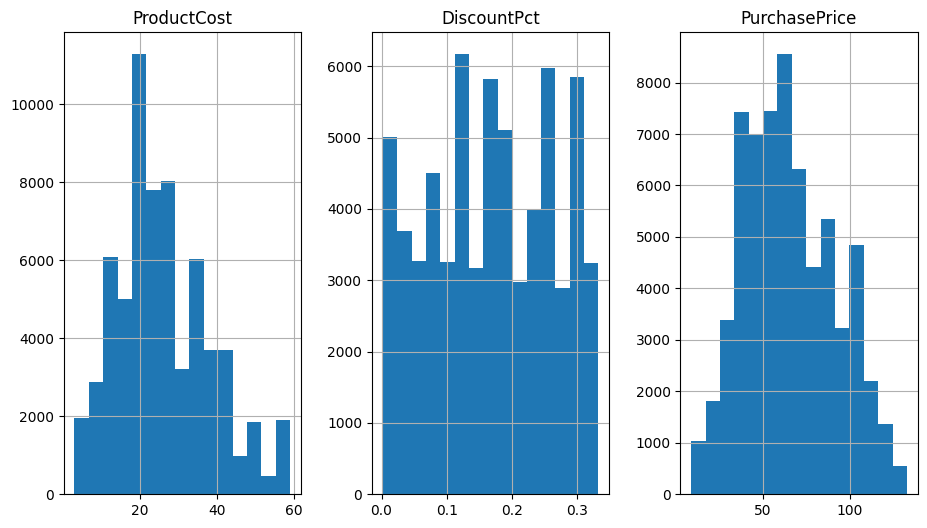

In [24]:
# Histograms for numerical data
numerical_cols = ['ProductCost', 'DiscountPct', 'PurchasePrice']#, 'msrp']
train[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(1, 4))
plt.show()

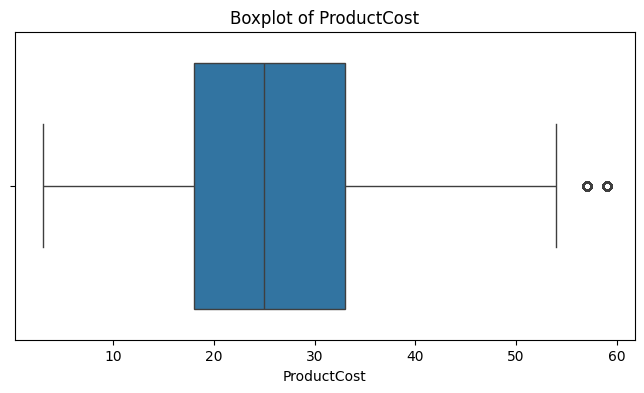

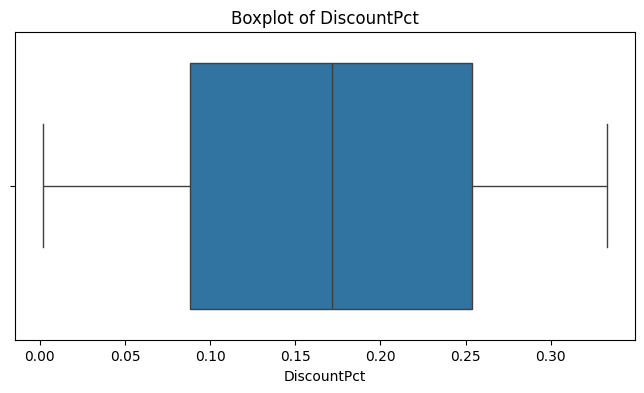

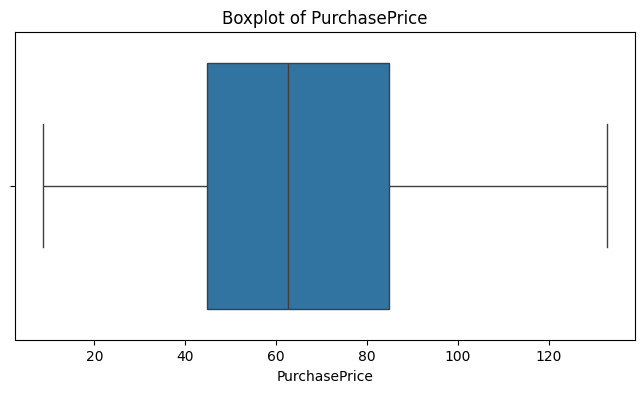

In [25]:
# Boxplots for numerical data to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [26]:
len(train[train['ProductCost']>55])

1900

In [27]:
train[train['ProductCost']>55]['ProductDepartment'].value_counts()

ProductDepartment
Womens    970
Mens      930
Name: count, dtype: int64

<ipython-input-28-db757a2186c0>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[column], shade=True)


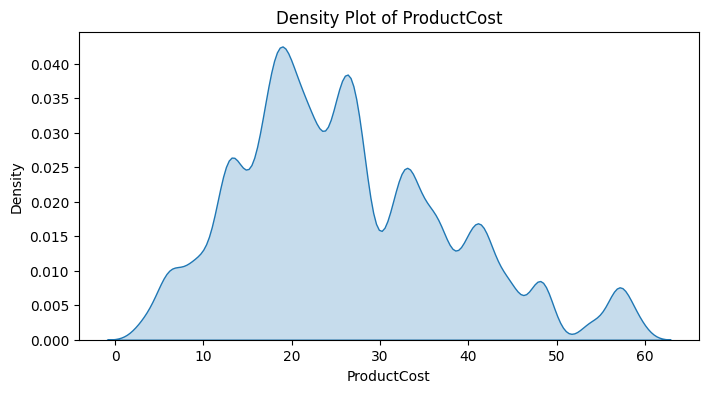

<ipython-input-28-db757a2186c0>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[column], shade=True)


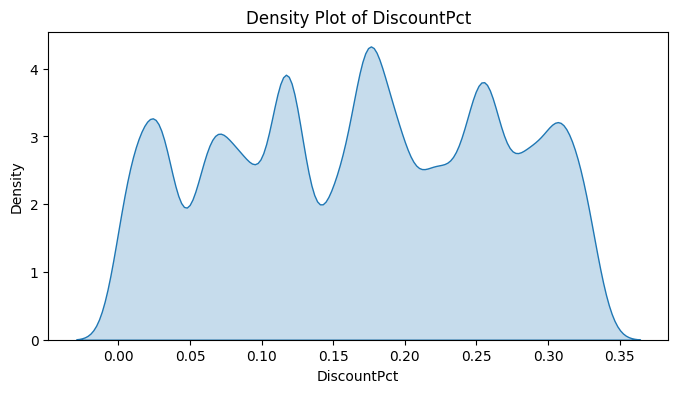

<ipython-input-28-db757a2186c0>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[column], shade=True)


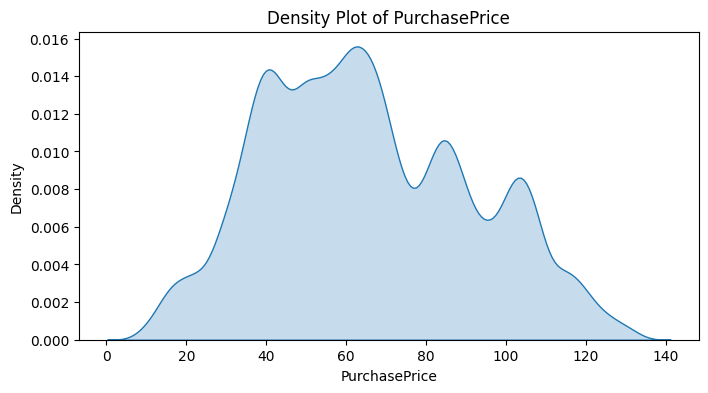

In [28]:
numerical_columns = ['ProductCost', 'DiscountPct', 'PurchasePrice']#,'msrp']

# Generate density plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(train[column], shade=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

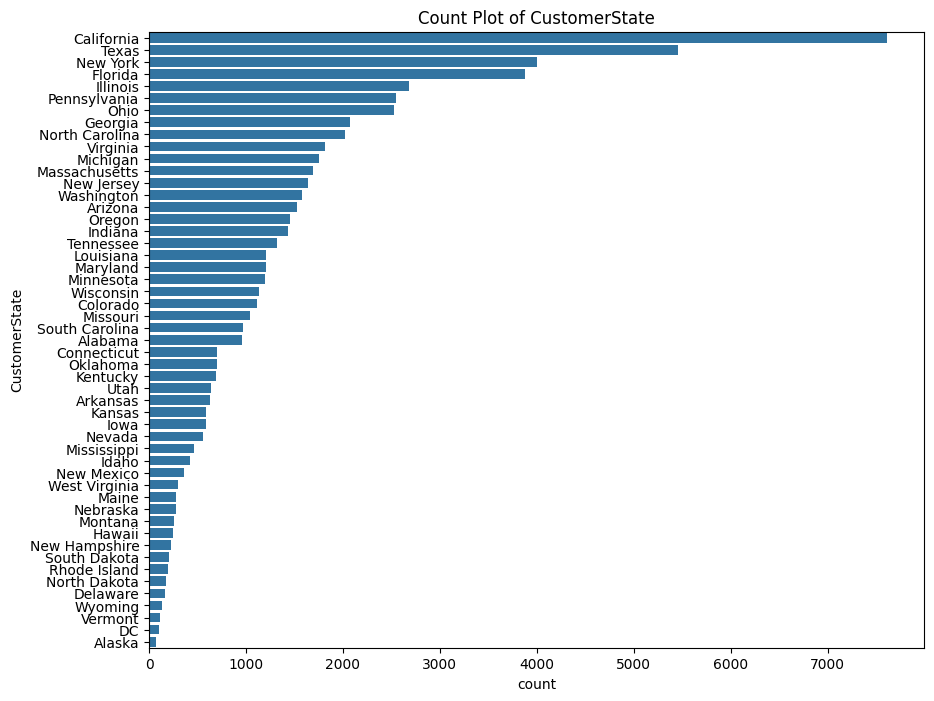

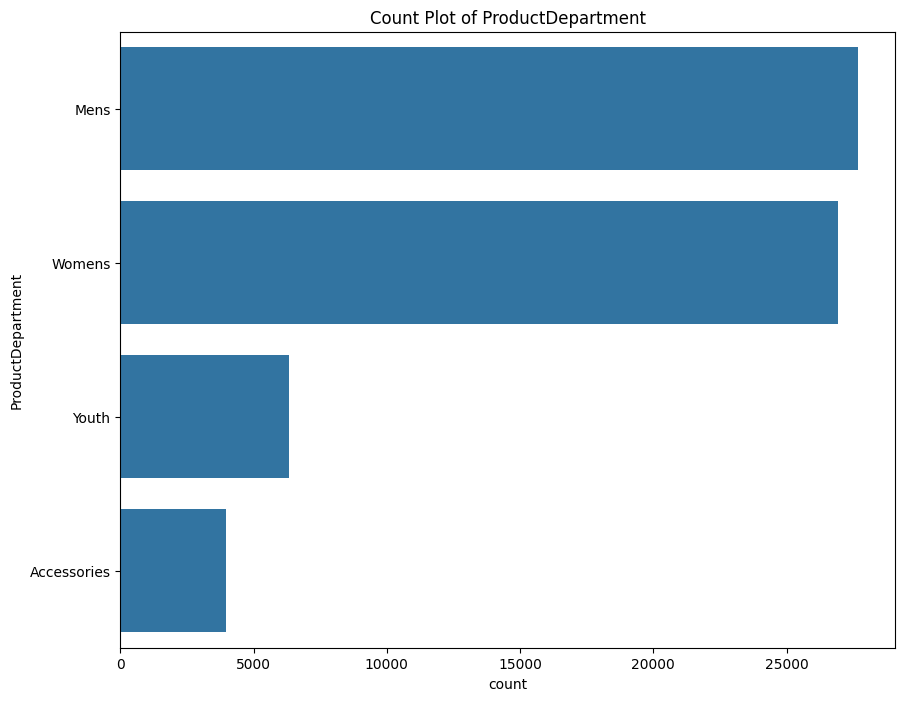

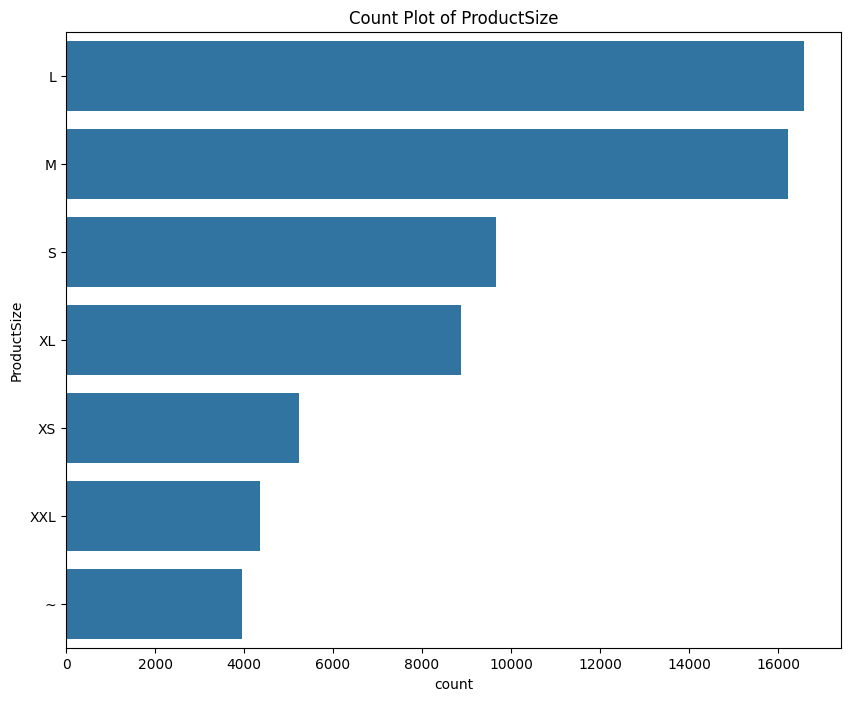

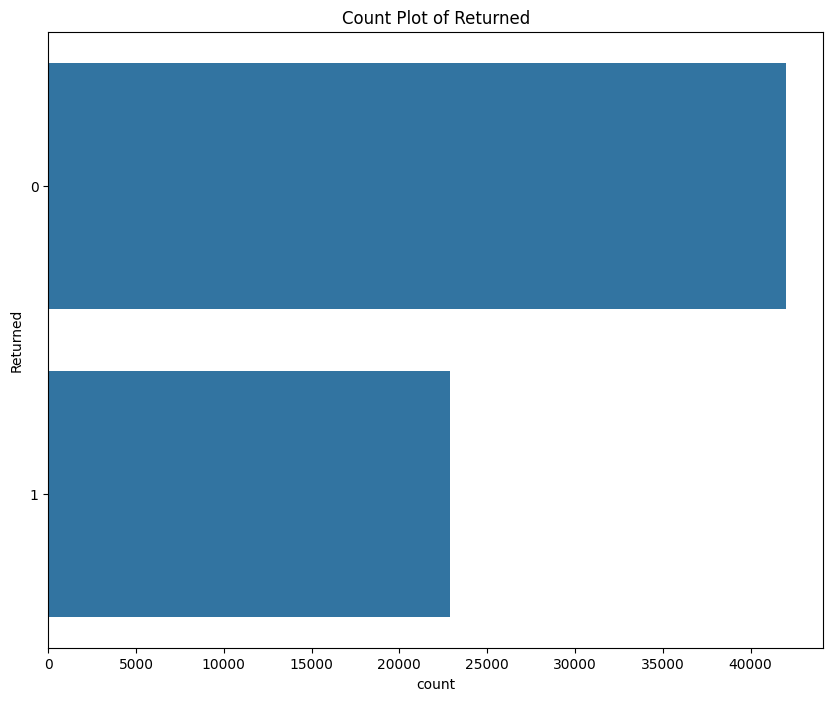

In [29]:
# Visualizations for categorical data
for column in ['CustomerState', 'ProductDepartment', 'ProductSize', 'Returned']:
    plt.figure(figsize=(10, 8))
    sns.countplot(y=column, data=train, order=train[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.show()

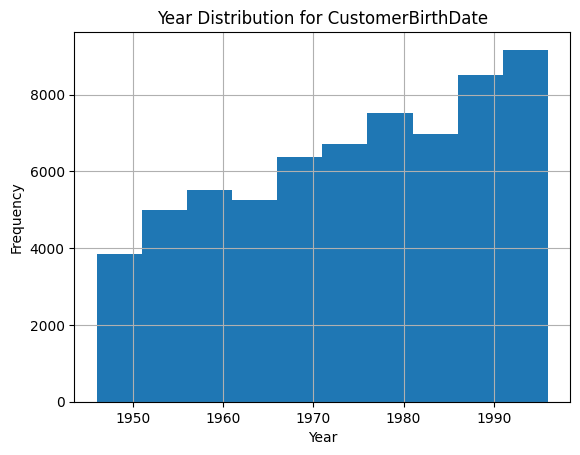

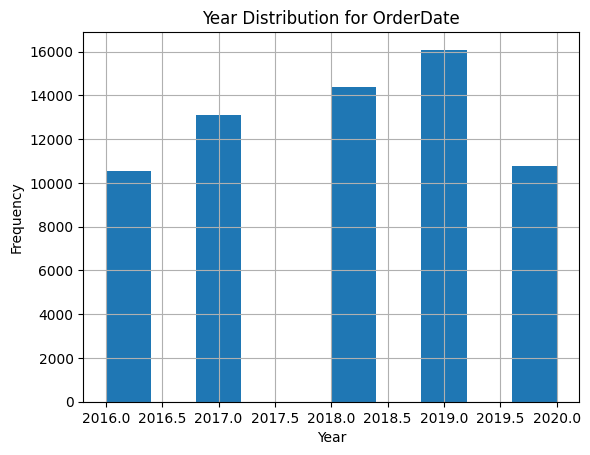

In [30]:
# Date distribution plots
for column in ['CustomerBirthDate', 'OrderDate']:
    train[column].dt.year.hist()
    plt.title(f'Year Distribution for {column}')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

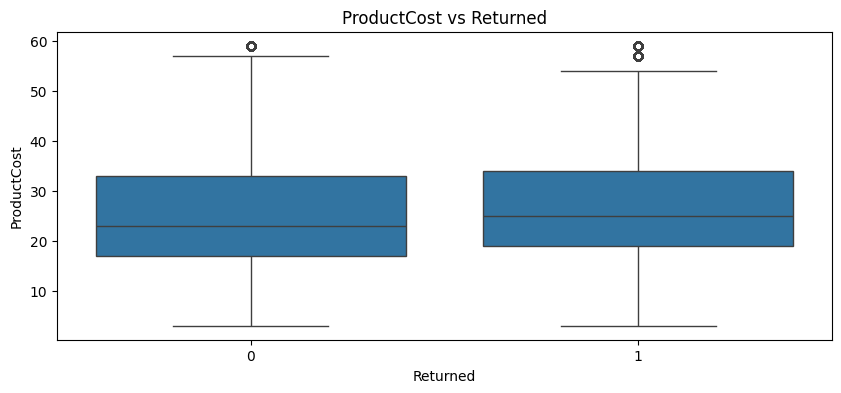

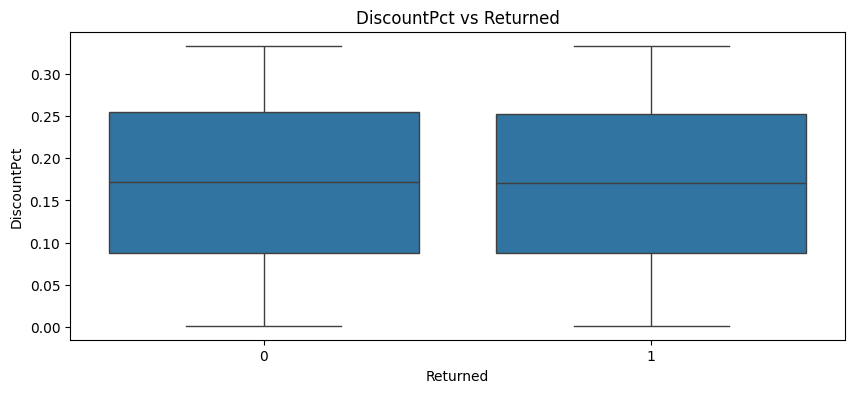

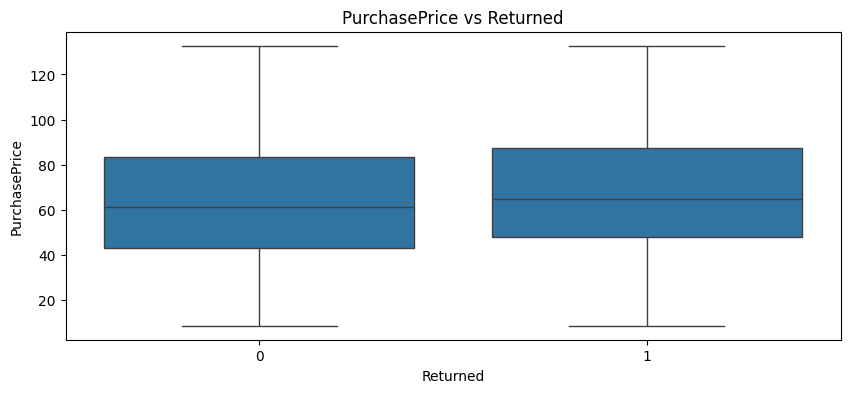

In [31]:
numerical_features = ['ProductCost', 'DiscountPct', 'PurchasePrice']#, 'msrp']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Returned', y=feature, data=train)
    plt.xlabel('Returned')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Returned')
    plt.show()

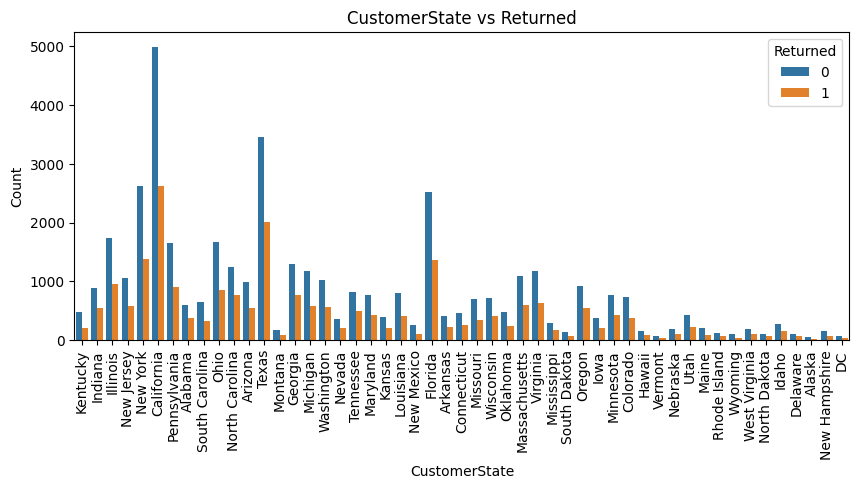

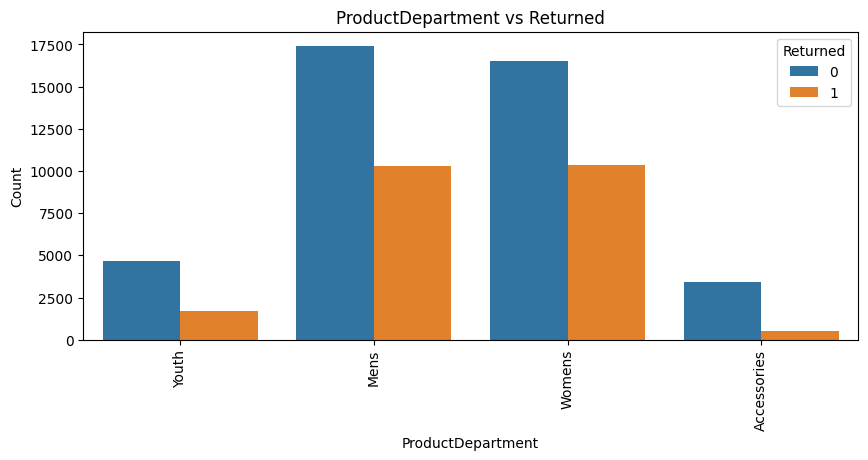

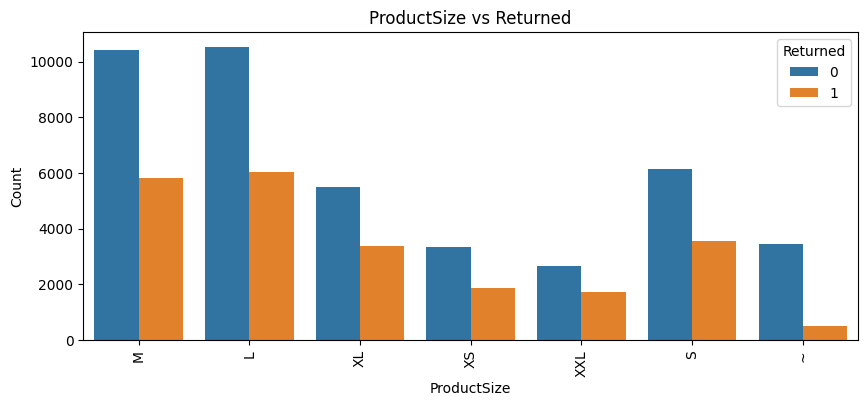

In [32]:
categorical_features = ['CustomerState', 'ProductDepartment', 'ProductSize']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, hue='Returned', data=train)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} vs Returned')
    plt.xticks(rotation=90)
    plt.show()


<ipython-input-33-8e9d89d6415a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=pivot_sorted.index, y=pivot_sorted['Percent Returned'], palette="viridis")


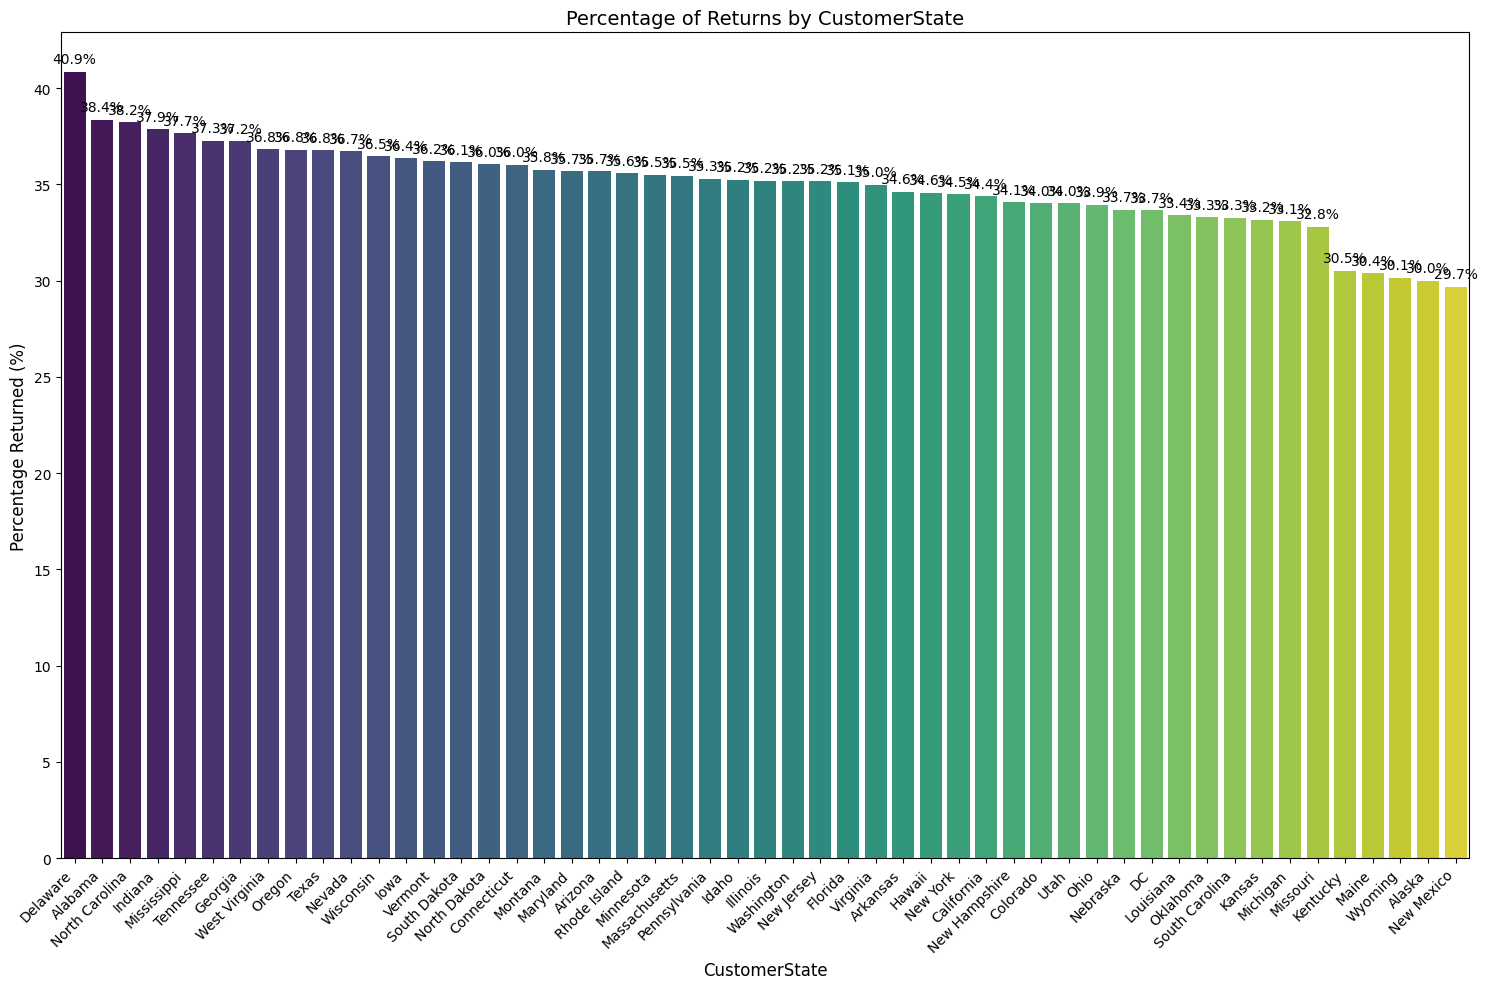

<ipython-input-33-8e9d89d6415a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=pivot_sorted.index, y=pivot_sorted['Percent Returned'], palette="viridis")


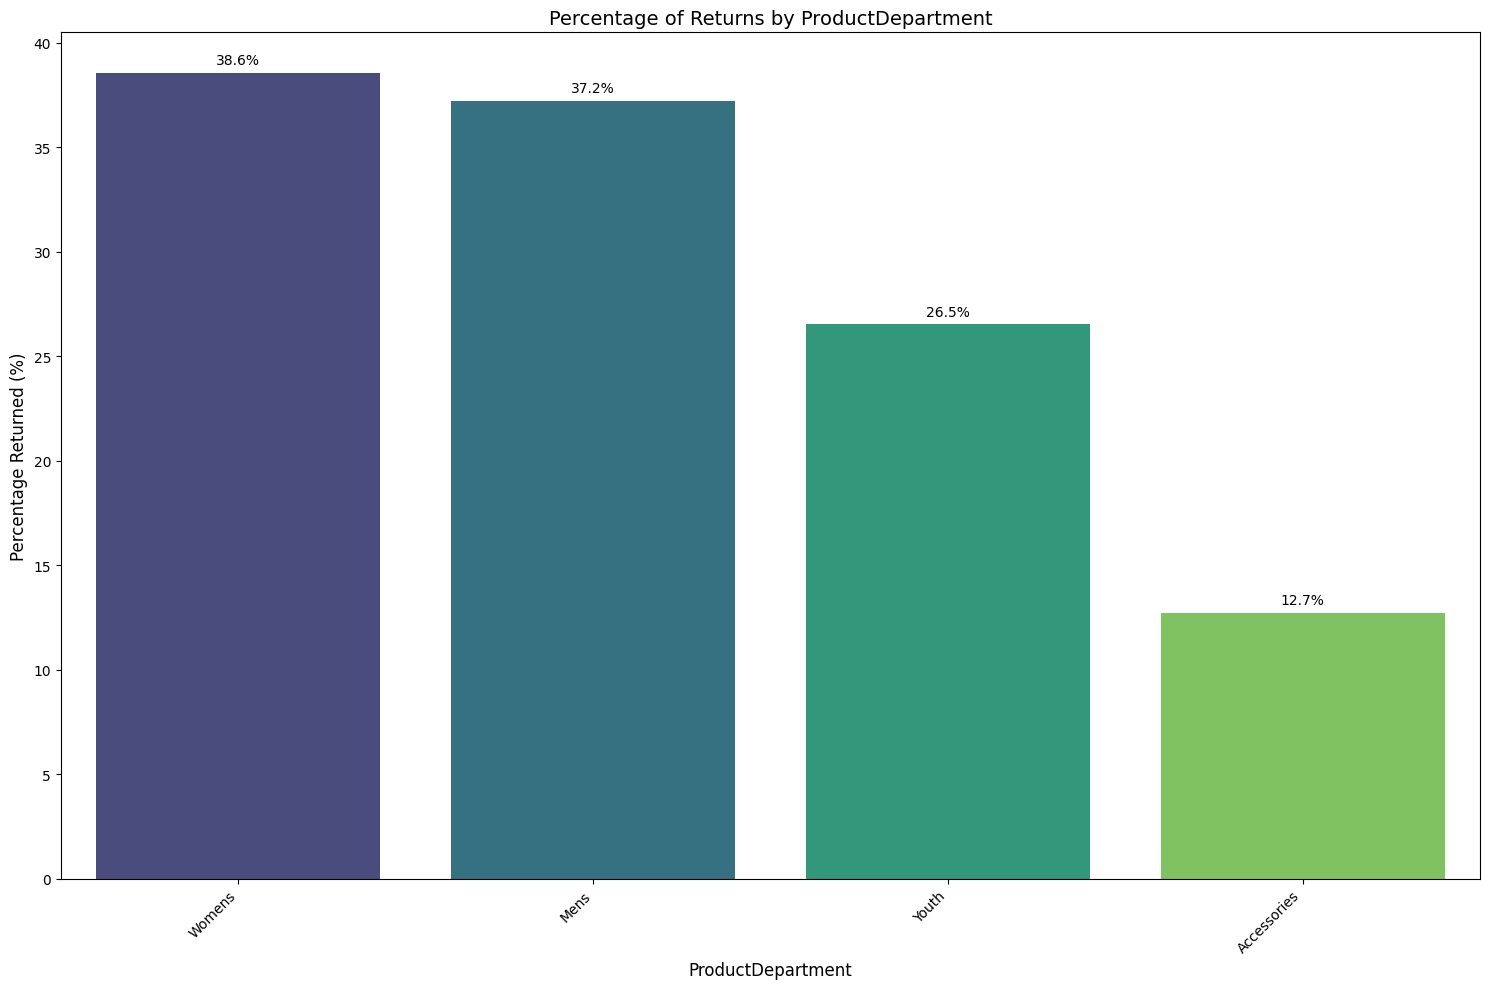

<ipython-input-33-8e9d89d6415a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=pivot_sorted.index, y=pivot_sorted['Percent Returned'], palette="viridis")


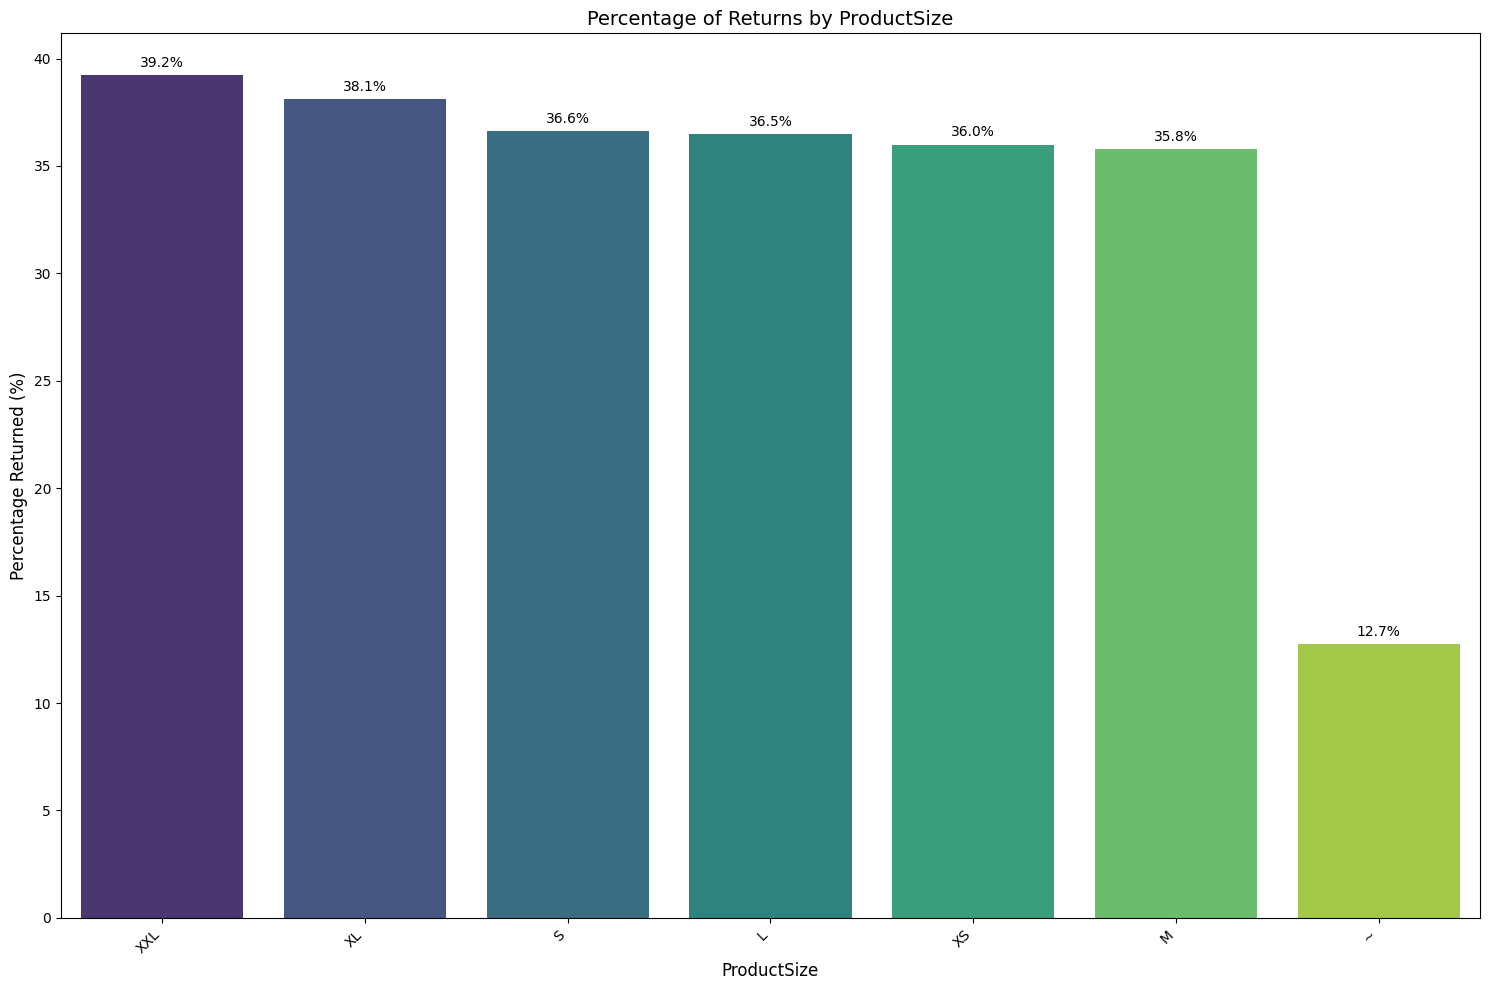

In [33]:
for feature in categorical_features:
    # Create a pivot table to calculate the percentage of returns
    pivot = train.pivot_table(index=feature, columns='Returned', aggfunc='size', fill_value=0)

    # Calculate the percentage of returns (where 'Returned' is assumed to be 1 for returned items)
    total = pivot.sum(axis=1)
    pivot['Percent Returned'] = 100 * pivot[1] / total

    # Sort the results in descending order based on the percentage of returns
    pivot_sorted = pivot.sort_values(by='Percent Returned', ascending=False)

    # Plotting the percentage of returns
    plt.figure(figsize=(15, 10))
    barplot = sns.barplot(x=pivot_sorted.index, y=pivot_sorted['Percent Returned'], palette="viridis")
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Percentage Returned (%)', fontsize=12)
    plt.title(f'Percentage of Returns by {feature}', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Adding the percentage labels on top of the bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f') + '%',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

    plt.tight_layout()
    plt.show()

TotalReturns
0     726
1     908
2     945
3     931
4     801
5     597
6     438
7     311
8     227
9     138
10    103
11     59
12     43
13     31
14     15
15     13
16     11
17      1
19      2
Name: count, dtype: int64


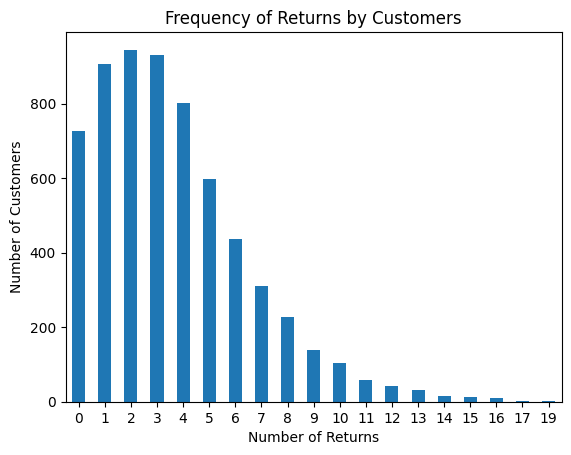

In [34]:
# Aggregate return data by CustomerID
return_counts = train.groupby('CustomerID')['Returned'].sum().reset_index()

# Rename the column for clarity
return_counts.rename(columns={'Returned': 'TotalReturns'}, inplace=True)

# Count how many times each return count appears
return_frequency = return_counts['TotalReturns'].value_counts().sort_index()
print(return_frequency)

# Bar plot of return frequency
return_frequency.plot(kind='bar')
plt.title('Frequency of Returns by Customers')
plt.xlabel('Number of Returns')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


**Feature Engineering**

## Calculation of MSRP

To estimate the original listing price of each product before any discounts were applied, the Manufacturer's Suggested Retail Price (MSRP) was calculated. This value helps in understanding the initial pricing strategy of the products before any sales or promotional strategies impacted the final purchase price.

In [35]:
train['msrp'] = train['PurchasePrice'] * (1 - train['DiscountPct'])

In [36]:
repeat_returns = train.groupby('CustomerID')['Returned'].sum()
train['RepeatReturnFlag'] = train['CustomerID'].map(repeat_returns > 1).astype(int)

# (2) Multi Item Order
# Assuming each row in your data represents an item in an order
multi_item_orders = train.groupby('OrderID').size()
train['MultiItemOrder'] = train['OrderID'].map(multi_item_orders > 1).astype(int)

# (3) Season from OrderDate
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

train['Season'] = train['OrderDate'].apply(get_season)

# (4) Customer Age
def calculate_age(birthdate, orderdate):
    return orderdate.year - birthdate.year - ((orderdate.month, orderdate.day) < (birthdate.month, birthdate.day))

train['CustomerAge'] = train.apply(lambda row: calculate_age(row['CustomerBirthDate'], row['OrderDate']), axis=1)

# (5) Holiday
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2017-01-01', end='2024-12-31').to_pydatetime()
train['Holiday'] = train['OrderDate'].isin(holidays).astype(int)


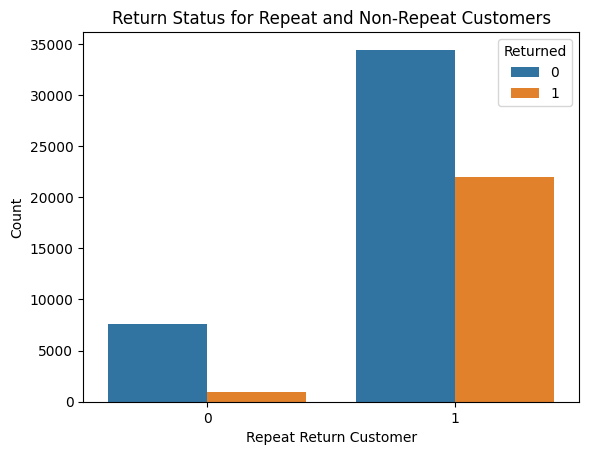

In [37]:
# Bar plot for Repeat Return Flag
sns.countplot(x='RepeatReturnFlag', hue='Returned', data=train)
plt.title('Return Status for Repeat and Non-Repeat Customers')
plt.xlabel('Repeat Return Customer')
plt.ylabel('Count')
plt.legend(title='Returned')
plt.show()

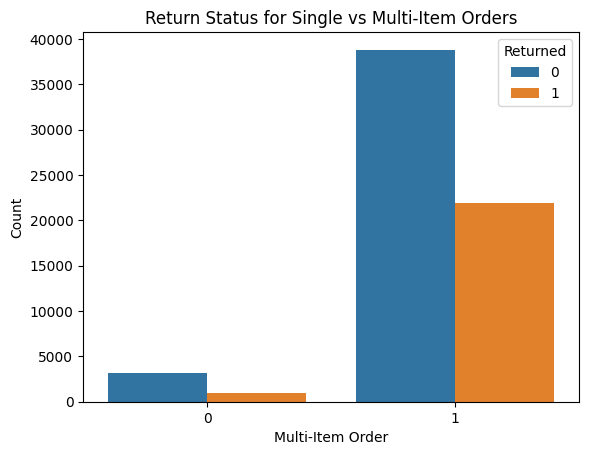

In [38]:
sns.countplot(x='MultiItemOrder', hue='Returned', data=train)
plt.title('Return Status for Single vs Multi-Item Orders')
plt.xlabel('Multi-Item Order')
plt.ylabel('Count')
plt.legend(title='Returned')
plt.show()


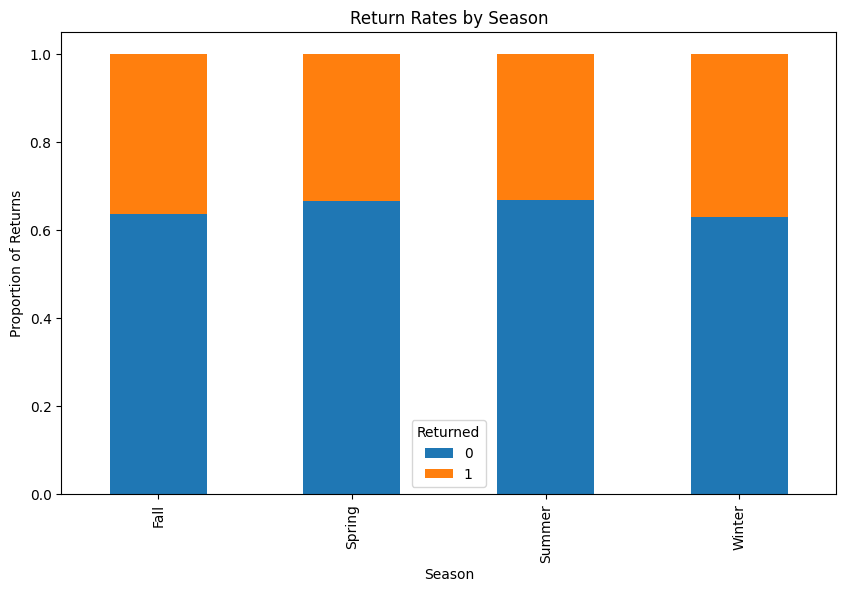

In [39]:
# Create a crosstab for Season and Returned
season_ct = pd.crosstab(train['Season'], train['Returned'], normalize='index')

# Plot as a stacked bar chart
season_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Return Rates by Season')
plt.ylabel('Proportion of Returns')
plt.show()


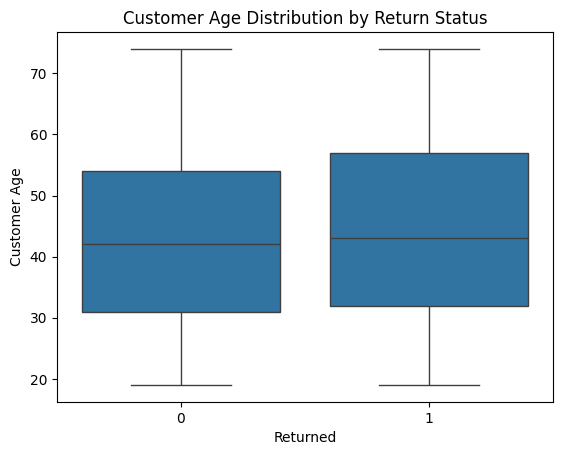

In [40]:
sns.boxplot(x='Returned', y='CustomerAge', data=train)
plt.title('Customer Age Distribution by Return Status')
plt.xlabel('Returned')
plt.ylabel('Customer Age')
plt.show()

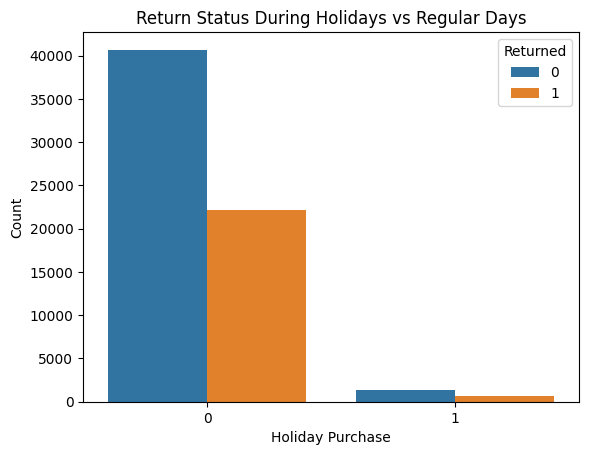

In [41]:
sns.countplot(x='Holiday', hue='Returned', data=train)
plt.title('Return Status During Holidays vs Regular Days')
plt.xlabel('Holiday Purchase')
plt.ylabel('Count')
plt.legend(title='Returned')
plt.show()


In [42]:
first_order_date = train.groupby('CustomerID')['OrderDate'].min()
train['DaysSinceFirstOrder'] = (train['OrderDate'] - train['CustomerID'].map(first_order_date)).dt.days
train['DaysSinceFirstOrder'].describe()

count    64912.000000
mean       485.017670
std        481.427861
min          0.000000
25%          0.000000
50%        378.000000
75%        854.000000
max       1787.000000
Name: DaysSinceFirstOrder, dtype: float64

<ipython-input-43-1d66af57a52c>:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 0][column], shade=True, color="blue", label='Not Returned')
<ipython-input-43-1d66af57a52c>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 1][column], shade=True, color="red", label='Returned')


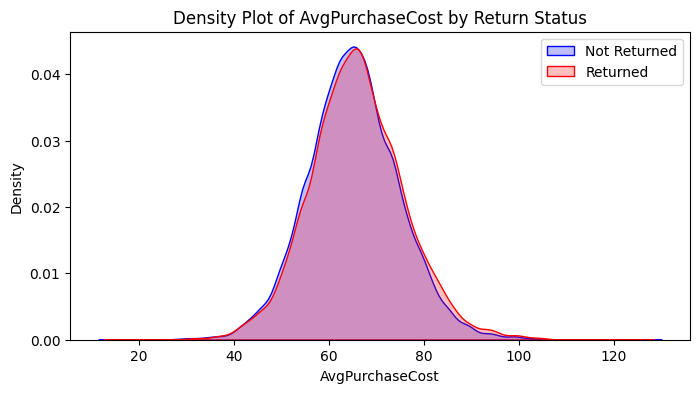

<ipython-input-43-1d66af57a52c>:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 0][column], shade=True, color="blue", label='Not Returned')
<ipython-input-43-1d66af57a52c>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 1][column], shade=True, color="red", label='Returned')


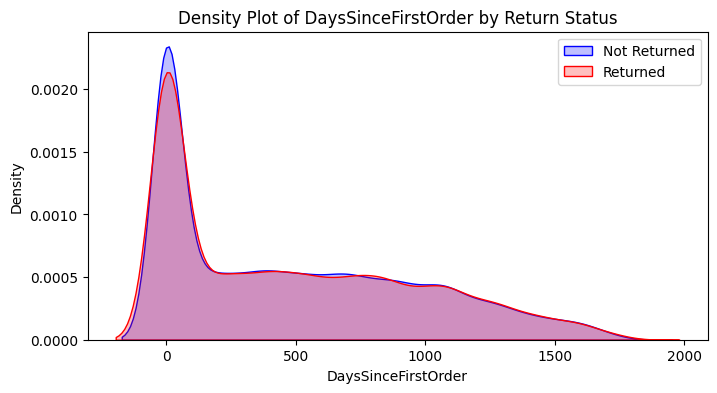

<ipython-input-43-1d66af57a52c>:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 0][column], shade=True, color="blue", label='Not Returned')
<ipython-input-43-1d66af57a52c>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 1][column], shade=True, color="red", label='Returned')


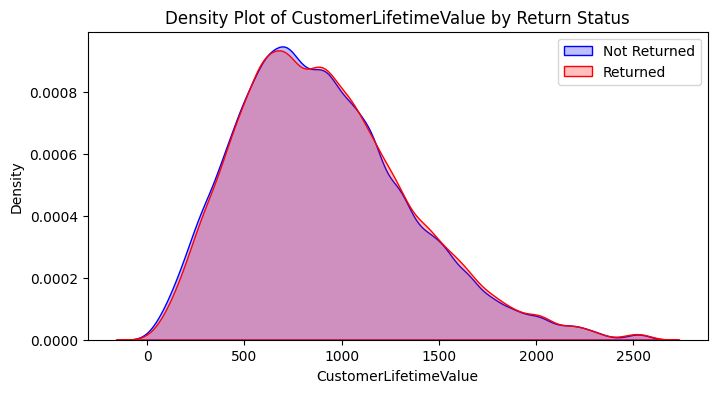

<ipython-input-43-1d66af57a52c>:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 0][column], shade=True, color="blue", label='Not Returned')
<ipython-input-43-1d66af57a52c>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 1][column], shade=True, color="red", label='Returned')


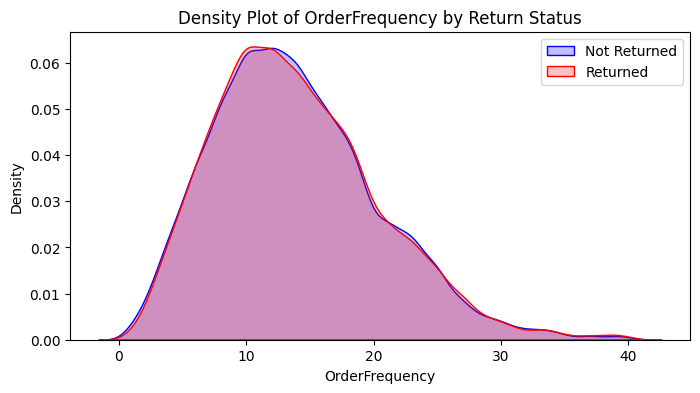

<ipython-input-43-1d66af57a52c>:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 0][column], shade=True, color="blue", label='Not Returned')
<ipython-input-43-1d66af57a52c>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 1][column], shade=True, color="red", label='Returned')


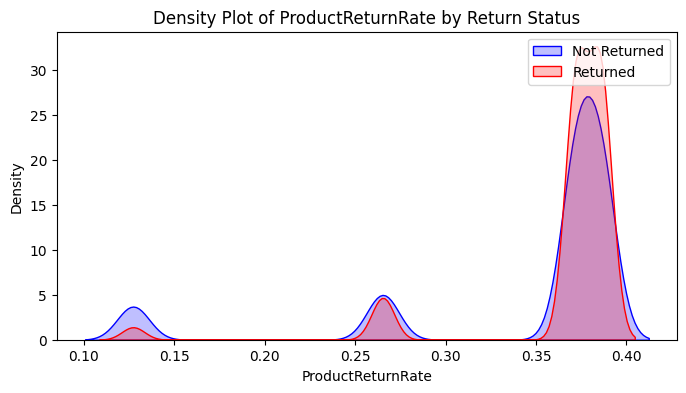

<ipython-input-43-1d66af57a52c>:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 0][column], shade=True, color="blue", label='Not Returned')
<ipython-input-43-1d66af57a52c>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 1][column], shade=True, color="red", label='Returned')


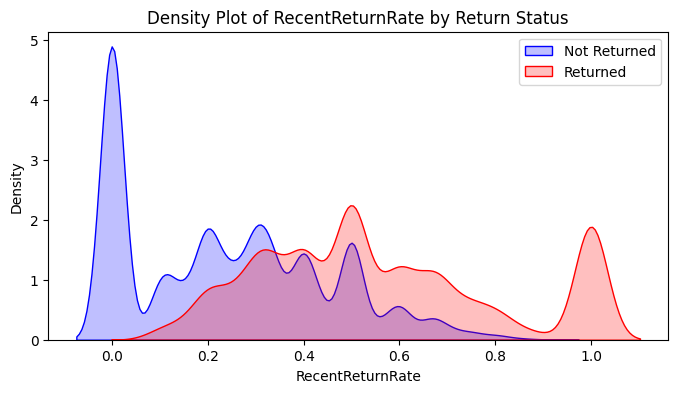

<ipython-input-43-1d66af57a52c>:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 0][column], shade=True, color="blue", label='Not Returned')
<ipython-input-43-1d66af57a52c>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 1][column], shade=True, color="red", label='Returned')


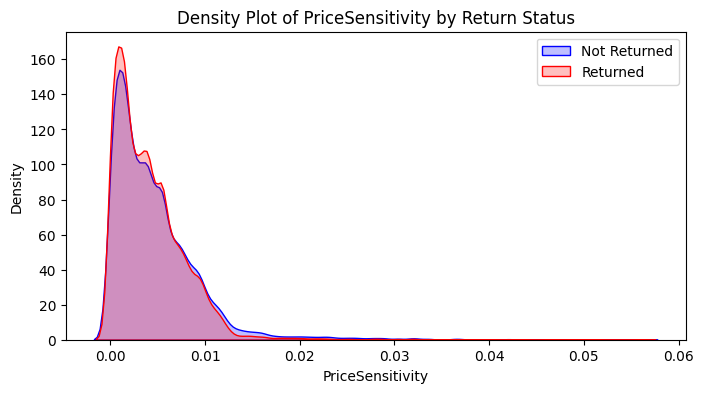

<ipython-input-43-1d66af57a52c>:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 0][column], shade=True, color="blue", label='Not Returned')
<ipython-input-43-1d66af57a52c>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Returned'] == 1][column], shade=True, color="red", label='Returned')


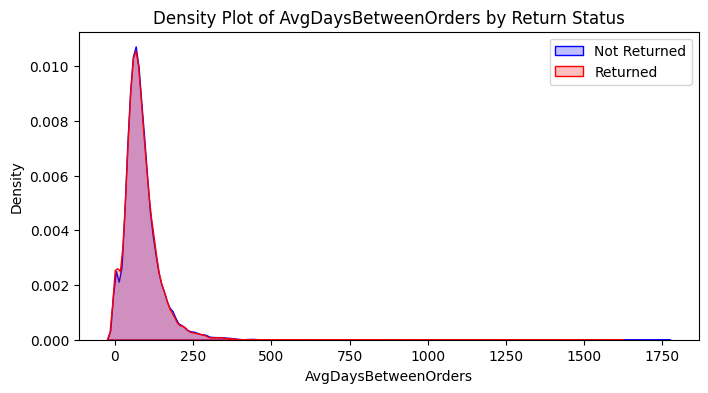

In [43]:
avg_cost = train.groupby('CustomerID')['PurchasePrice'].mean()
train['AvgPurchaseCost'] = train['CustomerID'].map(avg_cost)

clv = train.groupby('CustomerID')['PurchasePrice'].sum()
train['CustomerLifetimeValue'] = train['CustomerID'].map(clv)

order_frequency = train.groupby('CustomerID').size()
train['OrderFrequency'] = train['CustomerID'].map(order_frequency)

product_returns = train.groupby('ProductDepartment')['Returned'].mean()
train['ProductReturnRate'] = train['ProductDepartment'].map(product_returns)

train['DayOfWeek'] = train['OrderDate'].dt.day_name()

def recent_return_rate(x):
    return x.rolling(window=10, min_periods=1).mean()  # window size can be adjusted

sorted_train = train.sort_values(by=['CustomerID', 'OrderDate'])
train['RecentReturnRate'] = sorted_train.groupby('CustomerID')['Returned'].apply(recent_return_rate).reset_index(level=0, drop=True)

train['PriceSensitivity'] = train['DiscountPct'] / train['msrp']

train['PreviousOrderDate'] = train.groupby('CustomerID')['OrderDate'].shift(1)
train['DaysBetweenOrders'] = (train['OrderDate'] - train['PreviousOrderDate']).dt.days
average_days_between = train.groupby('CustomerID')['DaysBetweenOrders'].mean()
train['AvgDaysBetweenOrders'] = train['CustomerID'].map(average_days_between)


numerical_columns = ['AvgPurchaseCost',
                     'DaysSinceFirstOrder',
                     'CustomerLifetimeValue',
                     'OrderFrequency',
                     'ProductReturnRate',
                     'RecentReturnRate',
                     'PriceSensitivity',
                     'AvgDaysBetweenOrders'
                     ]

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    # Plot density for non-returned items
    sns.kdeplot(train[train['Returned'] == 0][column], shade=True, color="blue", label='Not Returned')
    # Plot density for returned items
    sns.kdeplot(train[train['Returned'] == 1][column], shade=True, color="red", label='Returned')
    plt.title(f'Density Plot of {column} by Return Status')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [44]:
import pandas as pd
import scipy.stats as stats

# Example dataset
# train = pd.read_csv('your_dataset.csv')

# List of categorical and numerical columns
categorical_columns = ['CustomerState',
                       'ProductDepartment',
                       "MultiItemOrder",
                       'ProductSize',
                       'Season',
                       'DayOfWeek',
                       'RepeatReturnFlag',
                       'Holiday']

numerical_columns = ['ProductCost',
                     'DiscountPct',
                     'PurchasePrice',
                     'msrp',
                     'AvgPurchaseCost',
                     'ProductReturnRate',
                     'RecentReturnRate',
                     'PriceSensitivity',
                     'DaysBetweenOrders',
                     'AvgDaysBetweenOrders',
                     'CustomerAge',
                     'DaysSinceFirstOrder',
                     'CustomerLifetimeValue',
                     'AvgDaysBetweenOrders']

# Dictionary to store test results
test_results = {}

# Function to perform chi-square test
def chi_square_test(data, column):
    contingency_table = pd.crosstab(data[column], data['Returned'])
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    return p

# Function to perform t-test
def t_test(data, column):
    group1 = data[data['Returned'] == 0][column]
    group2 = data[data['Returned'] == 1][column]
    t, p = stats.ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
    return p

# Conduct tests for categorical variables
for column in categorical_columns:
    p_value = chi_square_test(train, column)
    test_results[column] = ('Chi-square', p_value)

# Conduct tests for numerical variables
for column in numerical_columns:
    p_value = t_test(train, column)
    test_results[column] = ('T-test', p_value)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame.from_dict(test_results, orient='index', columns=['Test Type', 'P-value'])
results_df.sort_values(by='P-value', inplace=True)

# Display results
print(results_df)


                        Test Type        P-value
RepeatReturnFlag       Chi-square   0.000000e+00
ProductReturnRate          T-test   0.000000e+00
RecentReturnRate           T-test   0.000000e+00
ProductDepartment      Chi-square  2.677515e-274
ProductSize            Chi-square  1.288663e-204
PurchasePrice              T-test   1.226038e-84
MultiItemOrder         Chi-square   2.677571e-69
msrp                       T-test   5.609906e-66
PriceSensitivity           T-test   5.033804e-63
ProductCost                T-test   2.411132e-61
CustomerAge                T-test   1.749703e-31
DayOfWeek              Chi-square   1.553036e-29
AvgPurchaseCost            T-test   7.104799e-22
Season                 Chi-square   2.496334e-18
DaysBetweenOrders          T-test   3.817333e-04
AvgDaysBetweenOrders       T-test   6.238706e-04
CustomerLifetimeValue      T-test   6.702591e-04
CustomerState          Chi-square   2.352053e-02
DiscountPct                T-test   2.546172e-02
Holiday             

### Summary of Statistical Test Results

#### Highly Significant Results (p-value < 0.001):
- **RepeatReturnFlag**: Chi-square test shows a very strong association.
- **ProductReturnRate**, **RecentReturnRate**: T-tests indicate significant differences in means.
- **ProductDepartment**: Chi-square test reveals significant association with categories.
- **ProductSize**: Significant categorical differences detected by Chi-square test.
- **PurchasePrice**, **msrp**, **PriceSensitivity**, **ProductCost**: T-tests show significant mean differences.
- **MultiItemOrder**: Chi-square test indicates significant categorical associations.
- **CustomerAge**, **DayOfWeek**, **AvgPurchaseCost**, **Season**: Both continuous and categorical variables show significant differences or associations.

#### Moderately Significant Results (p-value < 0.05 but ≥ 0.001):
- **AvgDaysBetweenOrders**, **CustomerLifetimeValue**, **DaysBetweenOrders**: T-tests suggest moderate differences in means.
- **CustomerState**, **DiscountPct**: Chi-square and T-test indicate some level of association or difference.

#### Non-Significant Results (p-value ≥ 0.05):
- **Holiday**: Chi-square test suggests no significant association.
- **DaysSinceFirstOrder**: T-test shows no significant difference in means.

These results help identify which variables might be important in modeling or hypothesis testing, based on their statistical significance in tests for association (Chi-square) or differences in means (T-tests).


In [45]:
train['PreviousOrderDate'] = train['PreviousOrderDate'].fillna(0)
train['DaysBetweenOrders'] = train['DaysBetweenOrders'].fillna(0)

In [46]:
repeat_returns = train[['CustomerID', 'RepeatReturnFlag']].drop_duplicates()
product_returns = train[['ProductDepartment', 'ProductReturnRate']].drop_duplicates()

repeat_returns.to_csv(r'repeat_returns.csv')
product_returns.to_csv(r'product_returns.csv')

Preprocessing features, preparing train test split and generating summary metrics of classification performance to predict returned transactions

Metrics for Logistic Regression: {'ROC AUC': 0.8310484175651869, 'Accuracy': 0.7521663778162911, 'Precision': 0.6754702877787467, 'Recall': 0.5860354517942067, 'F1 Score': 0.6275826147346489}


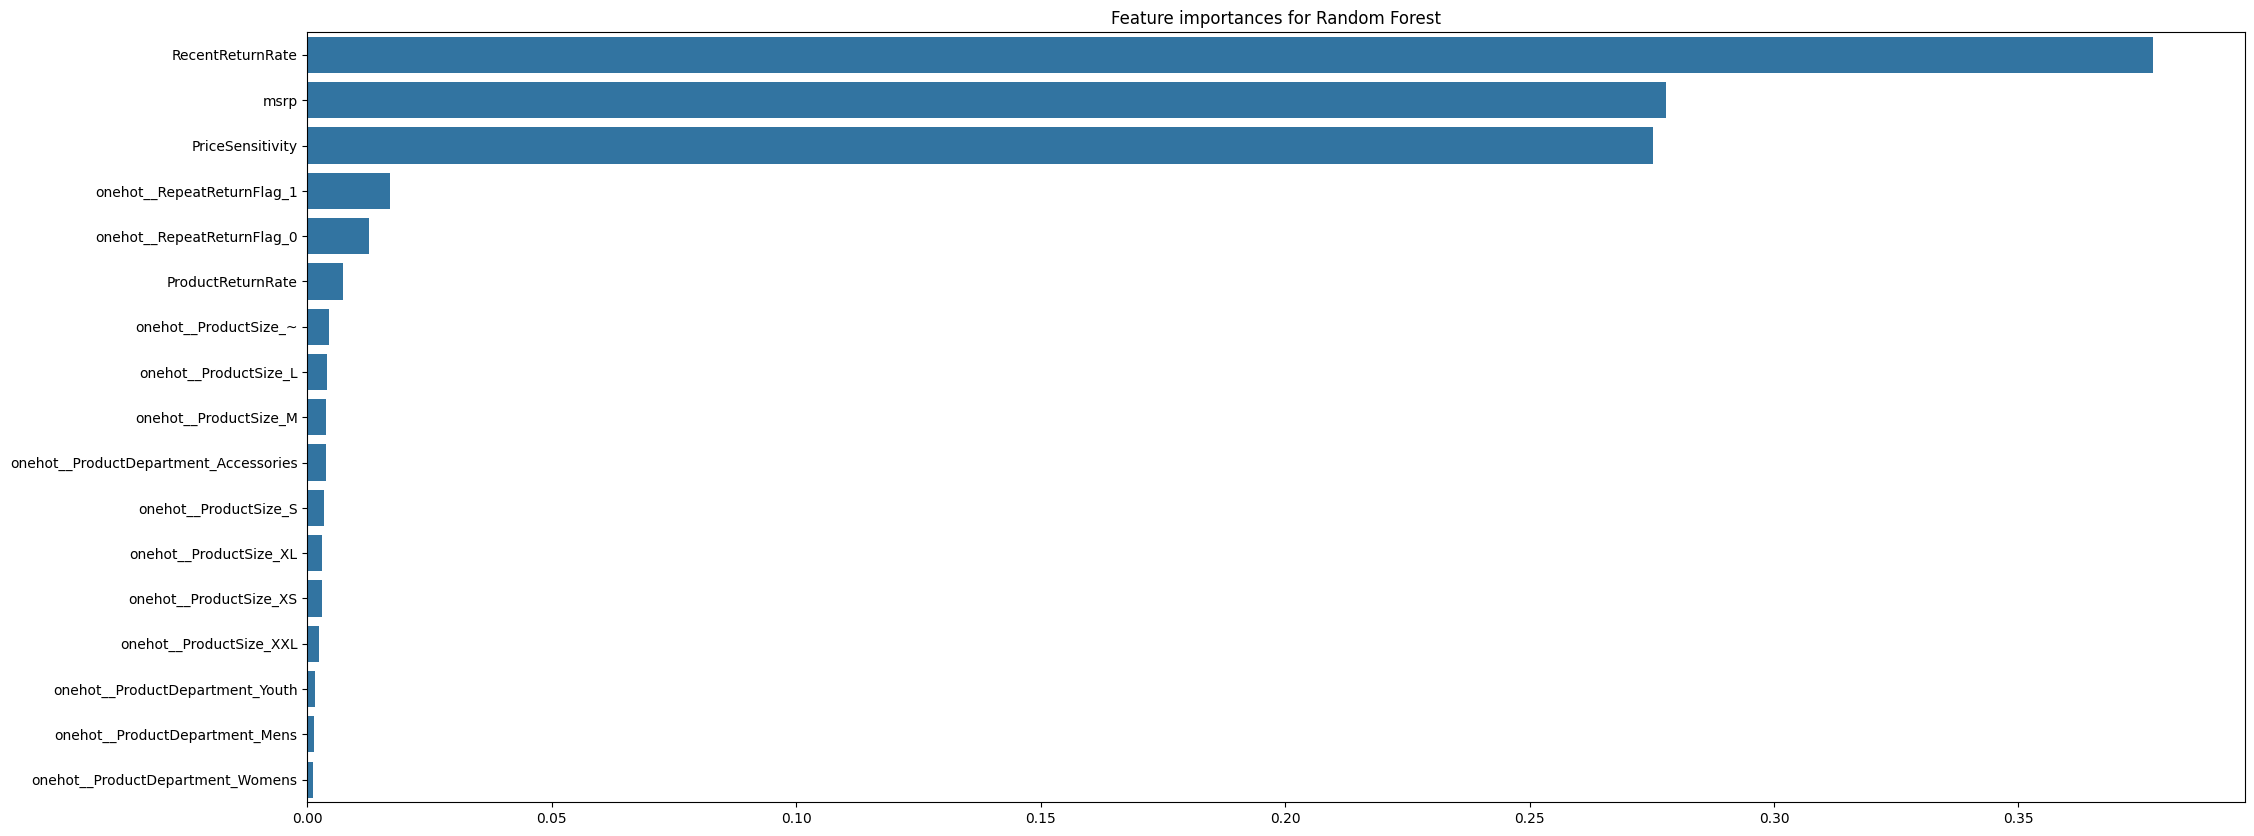

Metrics for Random Forest: {'ROC AUC': 0.7928850079528587, 'Accuracy': 0.7207009435778933, 'Precision': 0.6207729468599034, 'Recall': 0.5555555555555556, 'F1 Score': 0.5863563769107917}


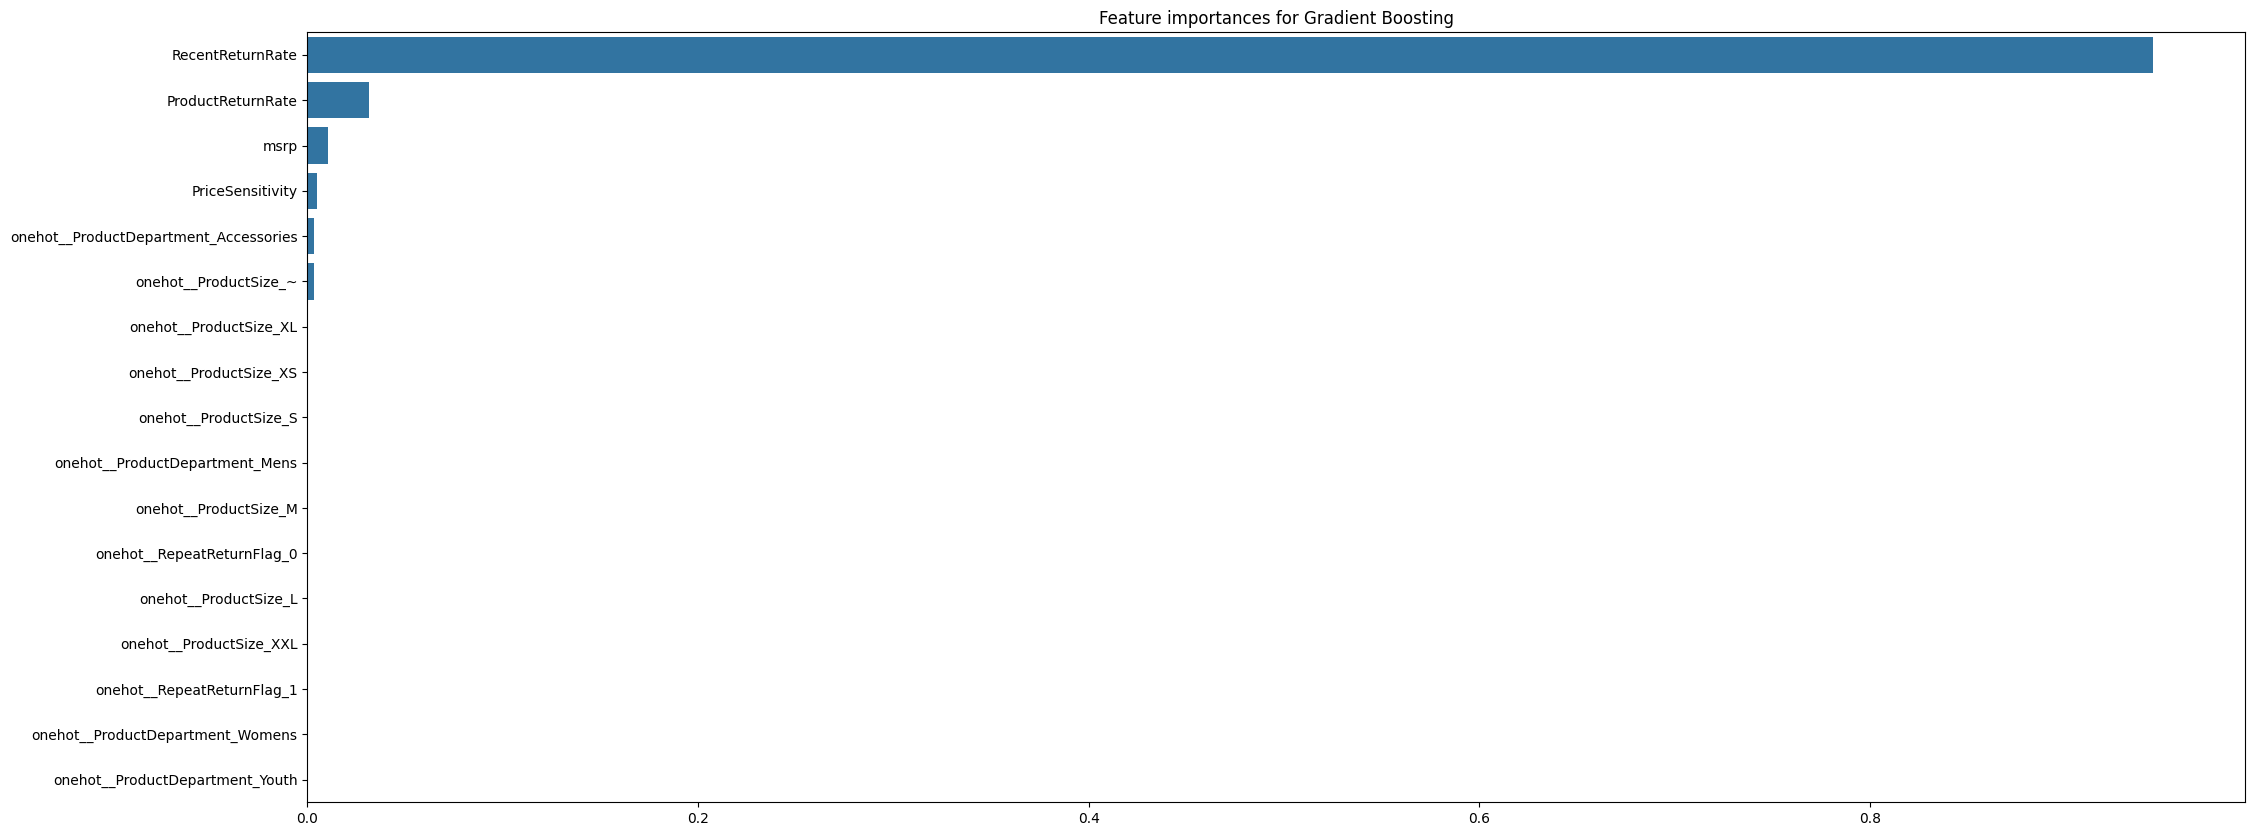

Metrics for Gradient Boosting: {'ROC AUC': 0.8322389244282218, 'Accuracy': 0.7531292124013095, 'Precision': 0.6849297241020302, 'Recall': 0.5688499783830523, 'F1 Score': 0.6215162966461975}


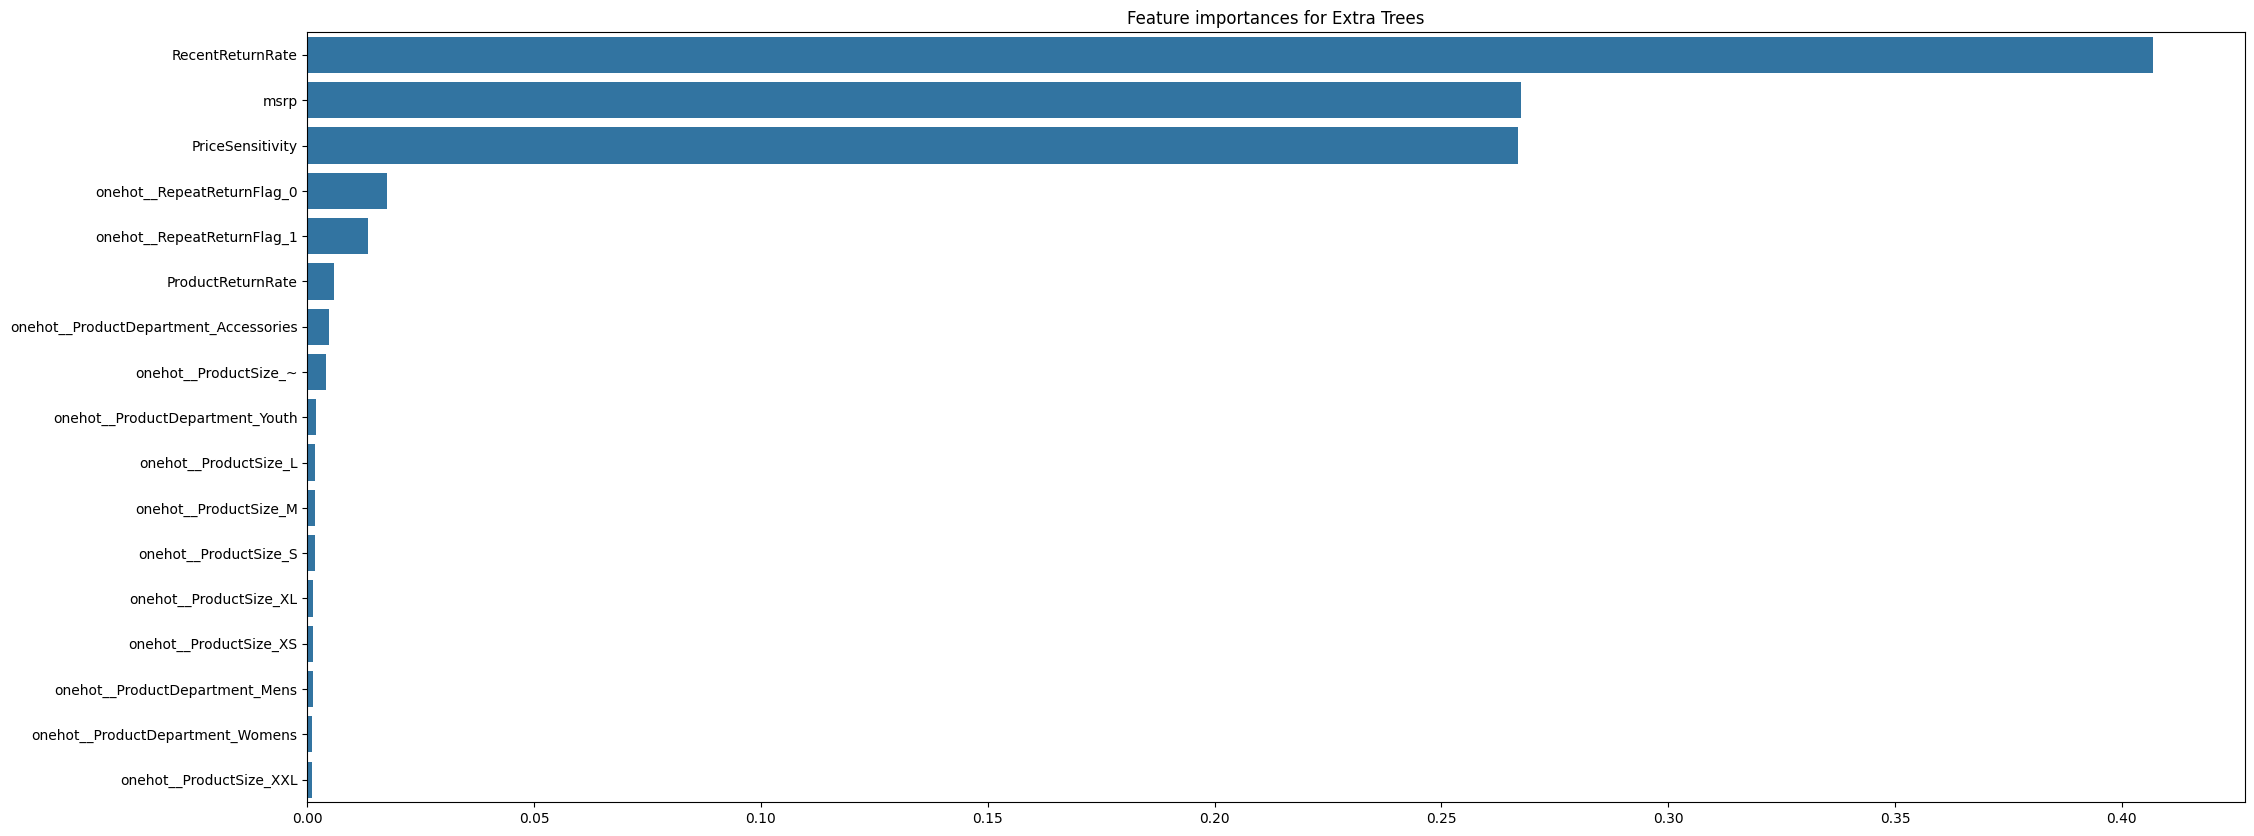

Metrics for Extra Trees: {'ROC AUC': 0.7592806330437699, 'Accuracy': 0.7143077219333719, 'Precision': 0.6110169491525423, 'Recall': 0.5455036748811067, 'F1 Score': 0.5764047510278665}


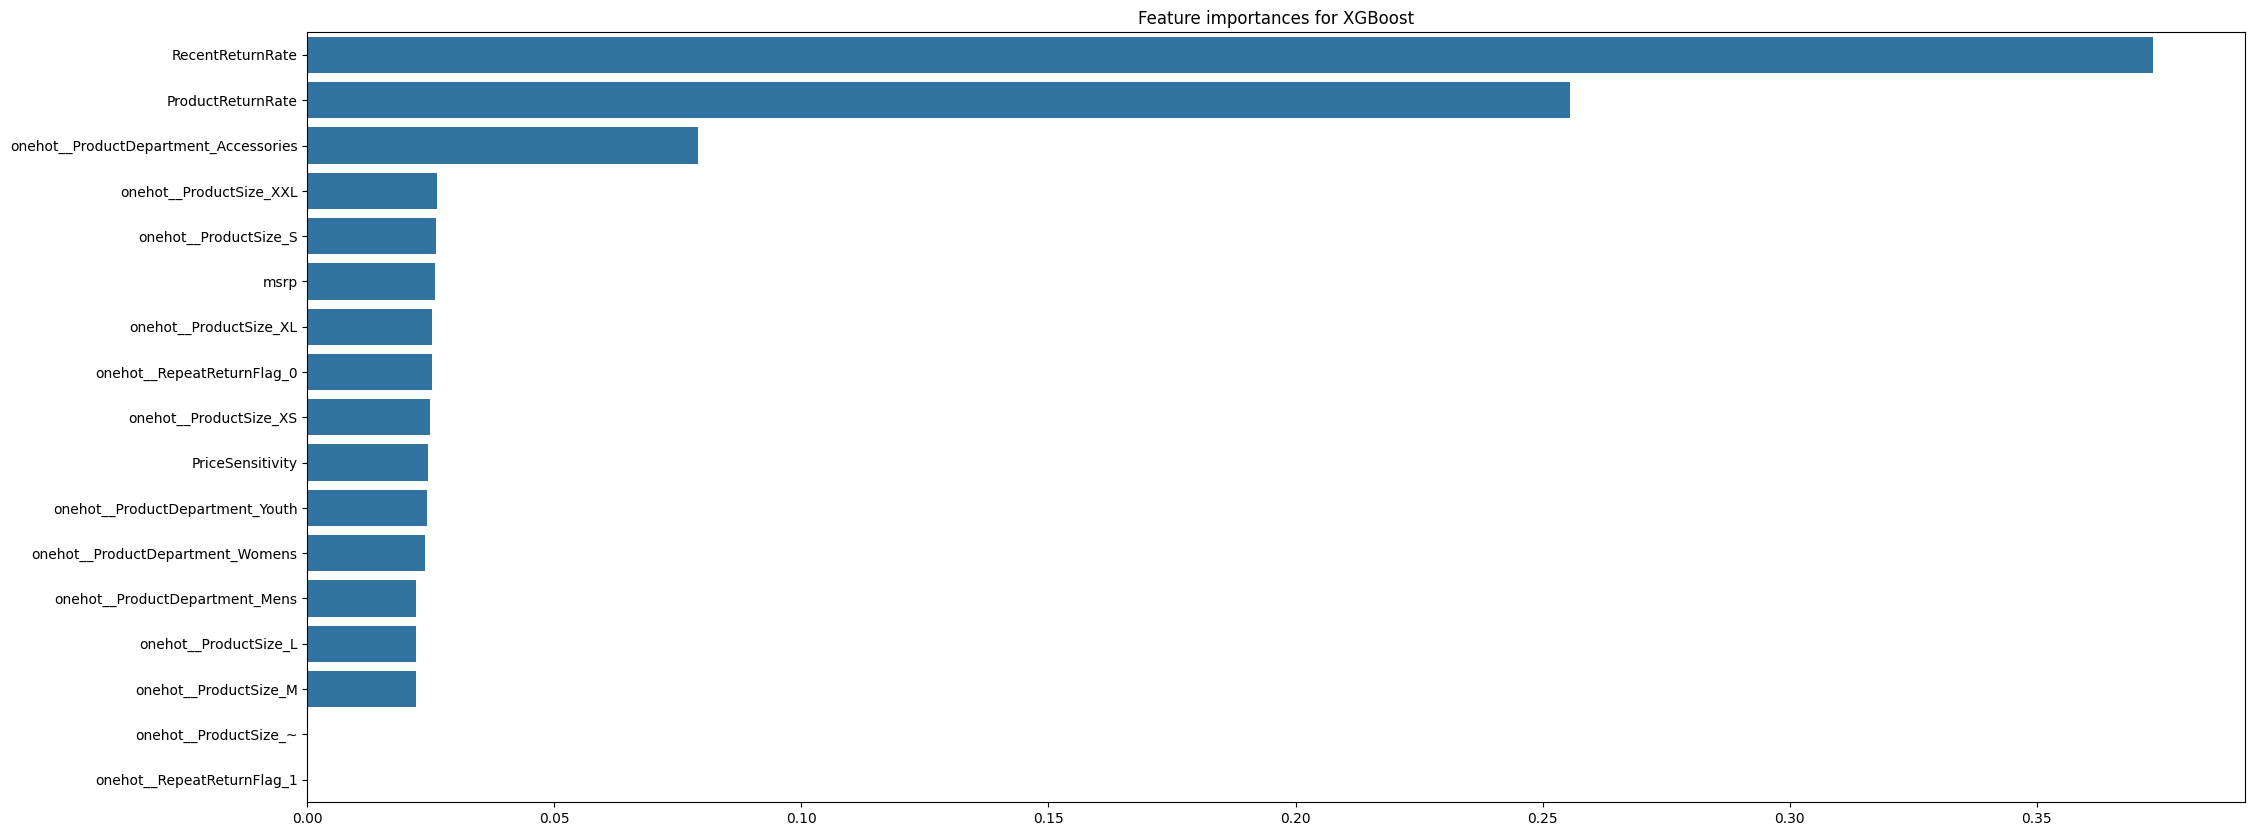

Metrics for XGBoost: {'ROC AUC': 0.8256828474687321, 'Accuracy': 0.750317735413056, 'Precision': 0.6863140896245459, 'Recall': 0.5512321660181583, 'F1 Score': 0.6114008271893545}
[LightGBM] [Info] Number of positive: 13625, number of negative: 25322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 38947, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349834 -> initscore=-0.619767
[LightGBM] [Info] Start training from score -0.619767


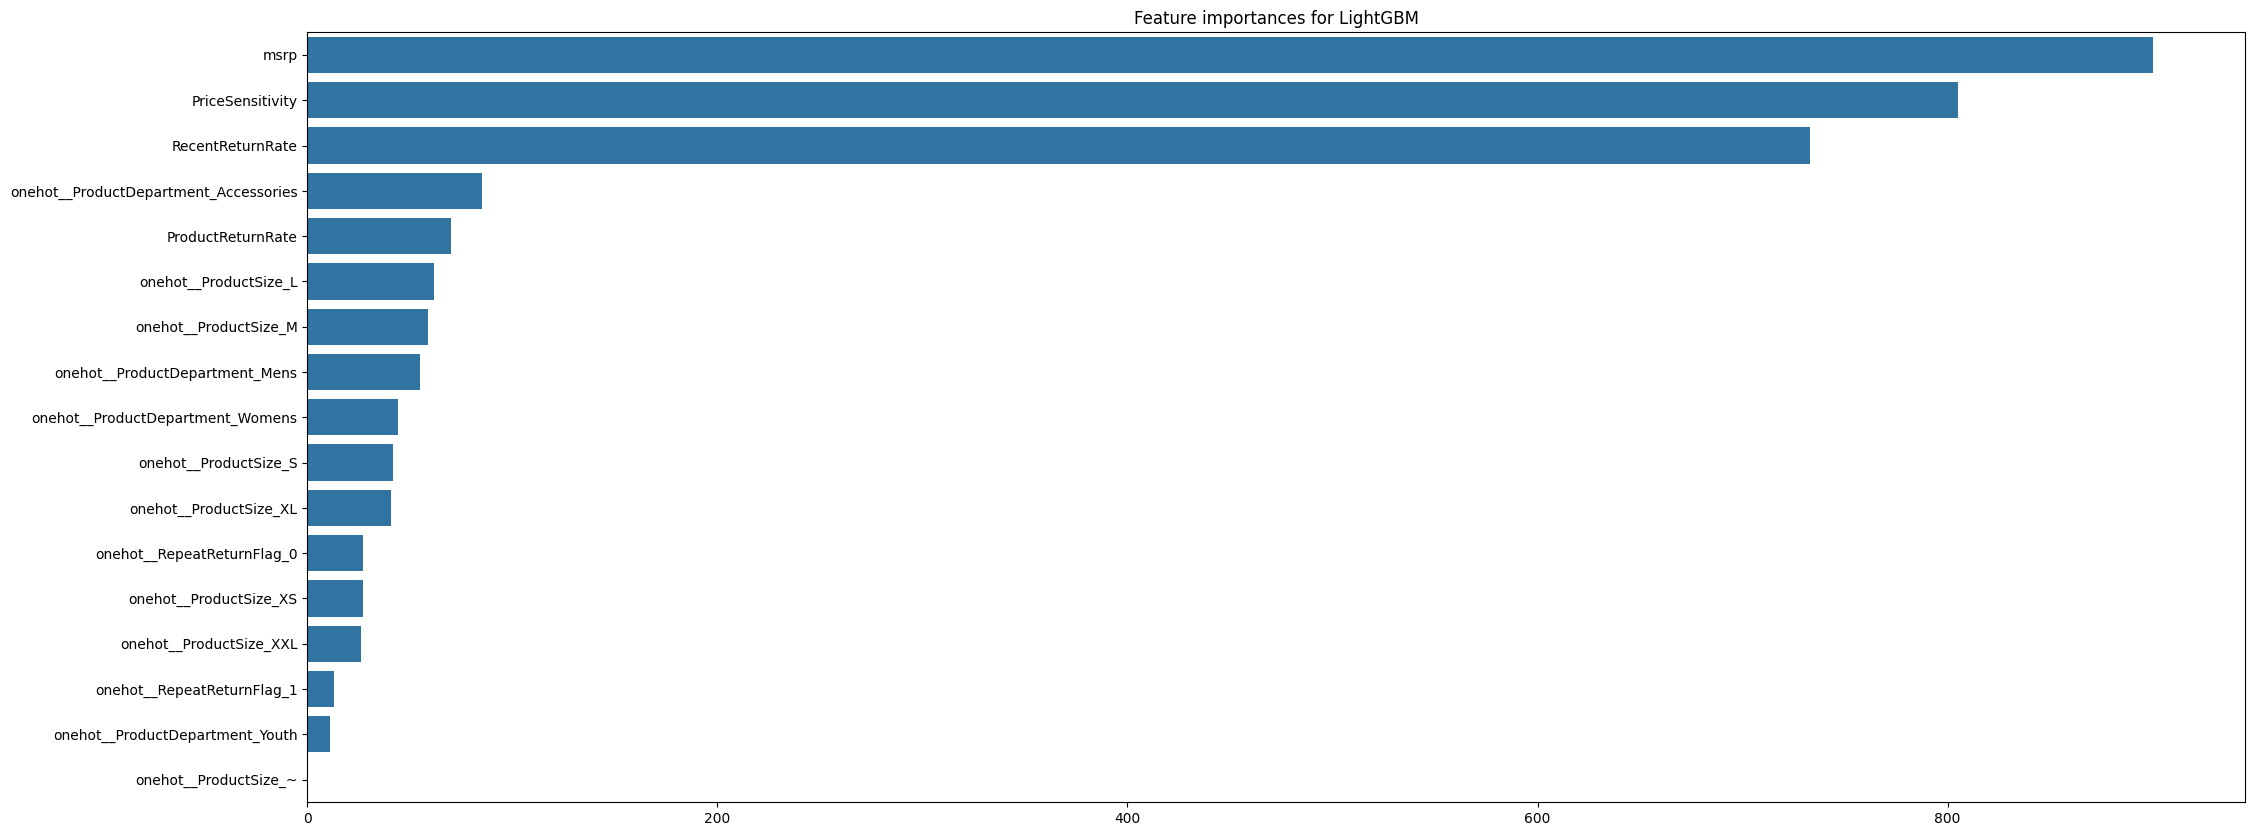

Metrics for LightGBM: {'ROC AUC': 0.8305384054378115, 'Accuracy': 0.7519738108992875, 'Precision': 0.6896412193148098, 'Recall': 0.5526372676178124, 'F1 Score': 0.6135845433817353}
Metrics for k-NN: {'ROC AUC': 0.7765241519626024, 'Accuracy': 0.7203543231272868, 'Precision': 0.6230988005440831, 'Recall': 0.5446389969736273, 'F1 Score': 0.5812330584232078}


In [48]:
def encode_columns(df, columns, method='onehot', target=None):
    """
    Encode specified columns in a DataFrame using the specified method and merge them back into the original DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - columns (list of str): List of column names to encode.
    - method (str): The encoding method. Supported methods are 'label', 'onehot', 'binary', 'frequency', 'target', 'hash', 'ordinal'.
    - target (str): Target column for target encoding (optional, required if method='target').

    Returns:
    - pd.DataFrame: A DataFrame with the encoded columns merged with the original DataFrame.
    """
    original_columns = df.columns.difference(columns)  # Save original columns that are not to be encoded
    df_original = df[original_columns].reset_index(drop=True)  # Reset index of the original DataFrame portion

    if method == 'label':
        label_encoder = LabelEncoder()
        for col in columns:
            df[col] = label_encoder.fit_transform(df[col])

    elif method == 'onehot':
        ct = ColumnTransformer(
            [('onehot', OneHotEncoder(sparse_output=False), columns)],
            remainder='drop'
        )
        df_transformed = pd.DataFrame(ct.fit_transform(df), columns=ct.get_feature_names_out())
        df_transformed.reset_index(drop=True, inplace=True)  # Reset the index of the transformed DataFrame
        df = pd.concat([df_transformed, df_original], axis=1)

    elif method == 'binary':
        encoder = BinaryEncoder(cols=columns)
        df = encoder.fit_transform(df)
        df.reset_index(drop=True, inplace=True)

    elif method == 'frequency':
        for col in columns:
            frequency = df[col].value_counts() / len(df)
            df[col] = df[col].map(frequency)

    elif method == 'target':
        if target is None:
            raise ValueError("Target column must be specified for target encoding.")
        encoder = TargetEncoder(cols=columns)
        df[columns] = encoder.fit_transform(df[columns], df[target])

    elif method == 'hash':
        encoder = HashingEncoder(cols=columns, n_components=8)
        df = encoder.fit_transform(df)
        df.reset_index(drop=True, inplace=True)

    elif method == 'ordinal':
        ordinal_encoder = OrdinalEncoder()
        df[columns] = ordinal_encoder.fit_transform(df[columns])

    else:
        raise ValueError("Unsupported encoding method provided. Choose from 'label', 'onehot', 'binary', 'frequency', 'target', 'hash', or 'ordinal'.")

    return df

train_reqd = train[['RepeatReturnFlag',
                  'RecentReturnRate',
                  'ProductReturnRate',
                  'ProductDepartment',
                  'ProductSize',
                  'msrp',
                  'PriceSensitivity',
                  'Returned']]

encoded_data = encode_columns(train_reqd, ['ProductDepartment',
                                          'ProductSize',
                                          'RepeatReturnFlag'], method='onehot')
continuous_columns = ['RecentReturnRate',
                      'ProductReturnRate',
                      'msrp',
                      'PriceSensitivity']

scaler = StandardScaler()
encoded_data_scaled = pd.DataFrame(scaler.fit_transform(encoded_data[continuous_columns]), columns=continuous_columns)
encoded_data_scaled.reset_index(drop=True, inplace=True)
encoded_data.drop(columns=continuous_columns, inplace=True)
encoded_data.reset_index(drop=True, inplace=True)
encoded_data = pd.concat([encoded_data, encoded_data_scaled], axis=1)

# Assuming the data is already encoded and split into X and y
X = encoded_data.drop(['Returned'], axis=1)
y = encoded_data['Returned']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'k-NN': KNeighborsClassifier()
}

features = X.columns.tolist()

# Evaluate base models without hyperparameter tuning
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    if hasattr(model, 'feature_importances_'):
      importances = model.feature_importances_
      indices = np.argsort(importances)[::-1]
      # Plot the feature importances of the model
      plt.figure(figsize=(25, 10))
      plt.title(f"Feature importances for {name}")
      sns.barplot(y=[features[i] for i in indices], x=importances[indices], orient='h')
      plt.show()

    metrics = {
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    results[name] = metrics
    print(f"Metrics for {name}: {metrics}")

# Select the best model based on ROC AUC
best_model_name = max(results, key=lambda x: results[x]['ROC AUC'])
best_model = models[best_model_name]


Average Metrics for Logistic Regression over 5-fold CV: {'ROC AUC': 0.8330609008159682, 'Accuracy': 0.7554536274062714, 'Precision': 0.6751629963708716, 'Recall': 0.5902000458557837, 'F1 Score': 0.629781346539005}
Average Metrics for Random Forest over 5-fold CV: {'ROC AUC': 0.7936244228618461, 'Accuracy': 0.7220698961500595, 'Precision': 0.6142235362827838, 'Recall': 0.5640601379494823, 'F1 Score': 0.5881835663225626}
Average Metrics for Gradient Boosting over 5-fold CV: {'ROC AUC': 0.8349160630566888, 'Accuracy': 0.7564087652491491, 'Precision': 0.6829075160472076, 'Recall': 0.5769112786120983, 'F1 Score': 0.6253639470683338}
Average Metrics for Extra Trees over 5-fold CV: {'ROC AUC': 0.7571722627890576, 'Accuracy': 0.716015556078435, 'Precision': 0.6047315819878805, 'Recall': 0.5542686193587834, 'F1 Score': 0.5797949348841054}
Average Metrics for XGBoost over 5-fold CV: {'ROC AUC': 0.8285633640404904, 'Accuracy': 0.7512633178879511, 'Precision': 0.6846794250409973, 'Recall': 0.54561

<ipython-input-49-20d10f8e3e47>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=scores, palette='viridis')
<ipython-input-49-20d10f8e3e47>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=scores, palette='viridis')
<ipython-input-49-20d10f8e3e47>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=scores, palette='viridis')
<ipython-input-49-20d10f8e3e47>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

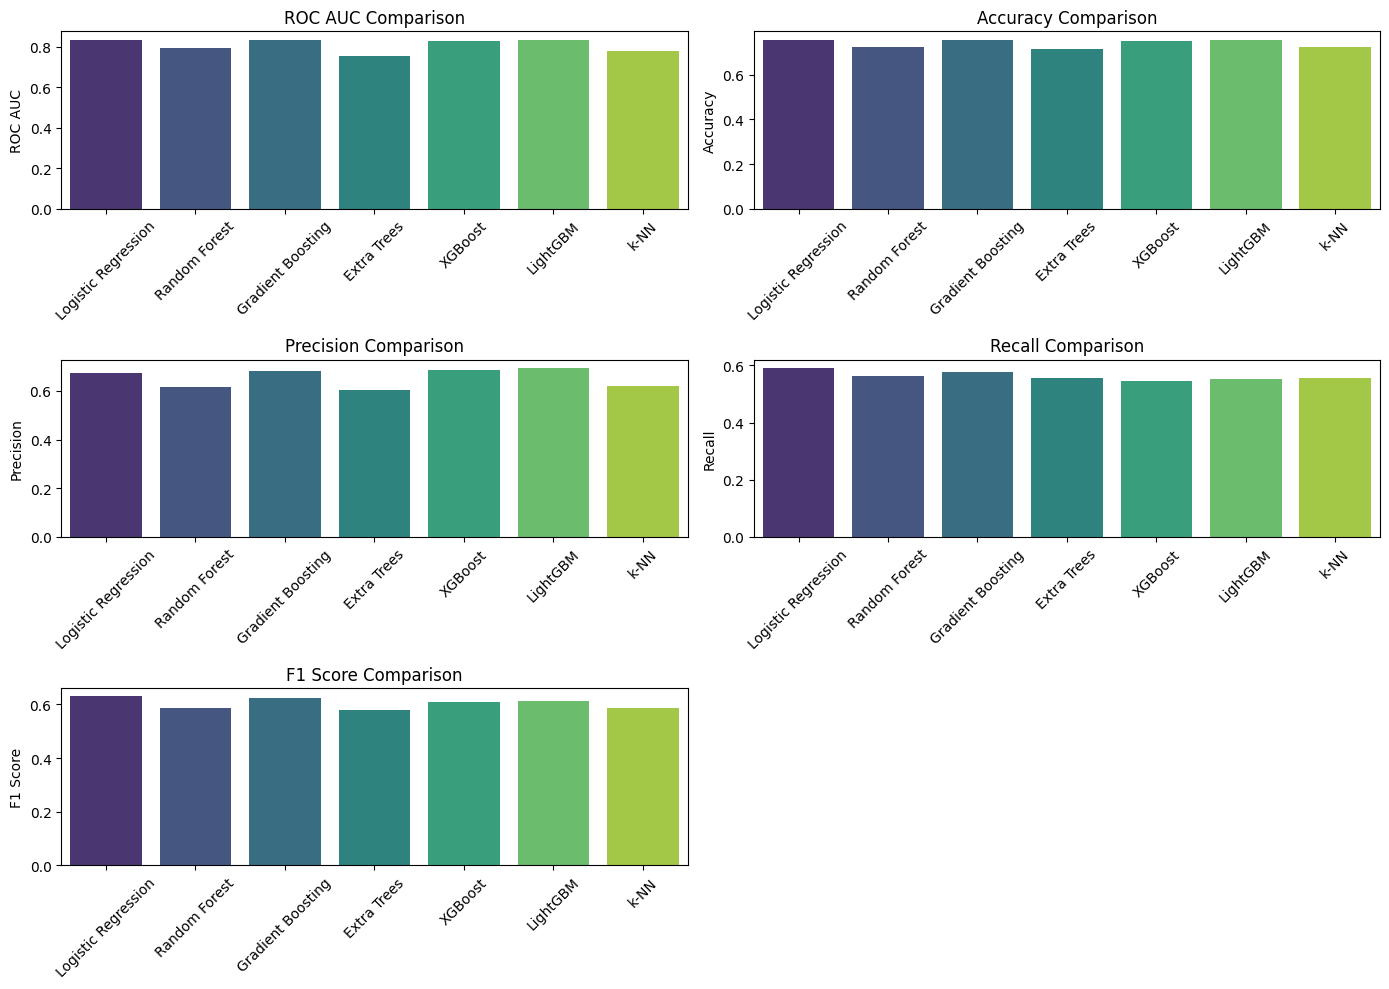

In [49]:
# Define the number of splits for StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize dictionary to store the average scores for each model
avg_results = {}

# Define custom scorer if necessary (example for ROC AUC)
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Evaluate models using cross-validation and collect average scores
for name, model in models.items():
    # Collect scores for various metrics
    roc_auc_scores = cross_val_score(model, X, y, scoring=roc_auc_scorer, cv=skf)
    accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=skf)
    precision_scores = cross_val_score(model, X, y, scoring='precision', cv=skf)
    recall_scores = cross_val_score(model, X, y, scoring='recall', cv=skf)
    f1_scores = cross_val_score(model, X, y, scoring='f1', cv=skf)

    # Calculate mean scores for each metric
    mean_scores = {
        'ROC AUC': np.mean(roc_auc_scores),
        'Accuracy': np.mean(accuracy_scores),
        'Precision': np.mean(precision_scores),
        'Recall': np.mean(recall_scores),
        'F1 Score': np.mean(f1_scores)
    }

    avg_results[name] = mean_scores
    print(f"Average Metrics for {name} over {n_splits}-fold CV: {mean_scores}")

# Find the best model based on average ROC AUC
best_model_name = max(avg_results, key=lambda x: avg_results[x]['ROC AUC'])
best_model = models[best_model_name]
print(f"Best Model Based on Average ROC AUC: {best_model_name}")

# Assuming avg_results is filled with the average scores for each model
metrics = ['ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    scores = [avg_results[model][metric] for model in models.keys()]
    sns.barplot(x=list(models.keys()), y=scores, palette='viridis')
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [50]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'Random Forest': {
        'n_estimators': randint(100, 500),
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': randint(3, 20),
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 11)
    },
    'Gradient Boosting': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10),
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 11),
        'subsample': uniform(0.8, 1)
    },
    'Extra Trees': {
        'n_estimators': randint(100, 500),
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': randint(3, 20),
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 11)
    },
    'XGBoost': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 8),
        'min_child_weight': [1, 3, 5],
        'subsample': uniform(0.8, 0.2),
        'colsample_bytree': uniform(0.8, 0.2)
    },
    'LightGBM': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 8),
        'num_leaves': randint(20, 50),
        'subsample': uniform(0.8, 1),
        'colsample_bytree': uniform(0.8, 1)
    }
}

# Models to tune
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

def tune_and_save_model(models, param_distributions, X_train, y_train):
    best_auc = -1
    best_model = None
    best_model_name = ""

    for name, model in models.items():
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_distributions[name],
            n_iter=100,
            scoring='roc_auc',
            cv=3,
            random_state=42,
            n_jobs=-1
        )
        random_search.fit(X_train, y_train)
        print(f"Best parameters for {name}: ", random_search.best_params_)
        print(f"Best ROC AUC score for {name}: ", random_search.best_score_)

        if random_search.best_score_ > best_auc:
            best_auc = random_search.best_score_
            best_model = model.set_params(**random_search.best_params_)
            best_model_name = name

    # Fit the best model
    best_model.fit(X_train, y_train)
    # Save the best model
    pickle.dump(best_model, open(f'best_model.pkl', 'wb'))
    print(f"Best overall model: {best_model_name} with AUC: {best_auc}")

# Assuming X_train and y_train are defined and ready to use
tune_and_save_model(models, param_distributions, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters for Random Forest:  {'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 401}
Best ROC AUC score for Random Forest:  0.8339286677264105


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
252 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Best parameters for Gradient Boosting:  {'learning_rate': 0.02999498316360058, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 199, 'subsample': 0.9428668179219408}
Best ROC AUC score for Gradient Boosting:  0.8353156527555469
Best parameters for Extra Trees:  {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 447}
Best ROC AUC score for Extra Trees:  0.8341444176271381
Best parameters for XGBoost:  {'colsample_bytree': 0.8601756619633539, 'learning_rate': 0.06696809887549353, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 162, 'subsample': 0.9953229911665307}
Best ROC AUC score for XGBoost:  0.8363030588987387


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
279 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1142, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 255, in train
    bo

[LightGBM] [Info] Number of positive: 13625, number of negative: 25322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 38947, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349834 -> initscore=-0.619767
[LightGBM] [Info] Start training from score -0.619767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

Predictions on Validation Dataset

In [51]:
test = pd.read_csv(r'test.csv')

repeat_returns = pd.read_csv(r'repeat_returns.csv')
test = pd.merge(test, repeat_returns, on='CustomerID', how='left')
test['RepeatReturnFlag'] = test['RepeatReturnFlag'].fillna(0).astype(int)

product_returns = pd.read_csv(r'product_returns.csv')
test = pd.merge(test, product_returns, on='ProductDepartment', how='left')
test['ProductReturnRate'] = test['ProductReturnRate'].fillna(0)

# Add a marker column to distinguish between train and test in the concatenated DataFrame
train['dataset'] = 'train'
test['dataset'] = 'test'

# Concatenate train and test for the purpose of calculating RecentReturnRate
recent_return_df = pd.concat([train, test])

# Sort by CustomerID and OrderDate
sorted_recent_return_df = recent_return_df.sort_values(by=['CustomerID', 'OrderDate'])

# Apply the recent_return_rate function
sorted_recent_return_df['RecentReturnRate'] = sorted_recent_return_df.groupby('CustomerID')['Returned'].apply(recent_return_rate).reset_index(level=0, drop=True)

# Filter out the train entries and keep only the test entries with updated RecentReturnRate
test = sorted_recent_return_df[sorted_recent_return_df['dataset'] == 'test'].drop(columns=['dataset'])

test['msrp'] = test['PurchasePrice'] * (1 - test['DiscountPct'])
test['PriceSensitivity'] = test['DiscountPct'] / test['msrp']

test_reqd = test[['RepeatReturnFlag',
                  'RecentReturnRate',
                  'ProductReturnRate',
                  'ProductDepartment',
                  'ProductSize',
                  'msrp',
                  'PriceSensitivity']]

encoded_data = encode_columns(test_reqd, ['ProductDepartment',
                                          'ProductSize',
                                          'RepeatReturnFlag'], method='onehot')
continuous_columns = ['RecentReturnRate',
                      'ProductReturnRate',
                      'msrp',
                      'PriceSensitivity']

encoded_data_scaled = pd.DataFrame(scaler.fit_transform(encoded_data[continuous_columns]), columns=continuous_columns)
encoded_data_scaled.reset_index(drop=True, inplace=True)
encoded_data.drop(columns=continuous_columns, inplace=True)
encoded_data.reset_index(drop=True, inplace=True)
encoded_data = pd.concat([encoded_data, encoded_data_scaled], axis=1)

# Assuming the data is already encoded and split into X and y
X_test = encoded_data#.drop(['Returned'], axis=1)

# Load the model
loaded_model = pickle.load(open(f'best_model.pkl', 'rb'))

# Make predictions on the test data
predictions = loaded_model.predict(X_test)
X_test['Returned'] = predictions
X_test.to_csv('predictions.csv', index=False)
